In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

import graphviz

sns.set_style('whitegrid')


In [17]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df_iris = pd.DataFrame(X, columns=feature_names)
df_iris['species'] = y
df_iris['species'] = df_iris['species'].apply(lambda x: target_names[x])

print("First 5 rows of the dataset:")
print(df_iris.head())
print("\nDataset Information:")
df_iris.info()


First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   speci

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 120 samples
Test set size: 30 samples


--- Gaussian Naive Bayes Results ---
Accuracy: 0.9500

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.90      0.95      0.93        40
   virginica       0.95      0.90      0.92        40

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



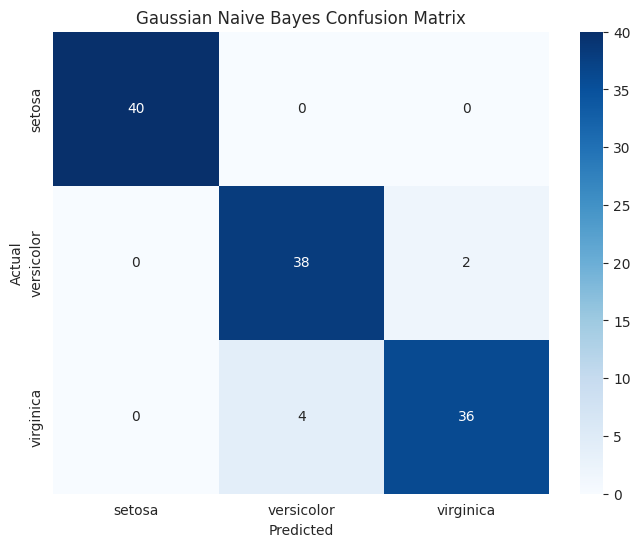

In [6]:
print("--- Gaussian Naive Bayes Results ---")

gnb = GaussianNB()

gnb.fit(X_train, y_train)


y_pred_gnb = gnb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_gnb):.4f}")
print("\nClassification Report:")

print(classification_report(y_test, y_pred_gnb, target_names=target_names))

cm_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



Metrics Comparison Table:

     Accuracy  Precision    Recall  F1-Score
20%  0.966667   0.969697  0.966667  0.966583
50%  0.946667   0.948470  0.946667  0.946581
80%  0.950000   0.950710  0.950000  0.949969


<Figure size 1000x600 with 0 Axes>

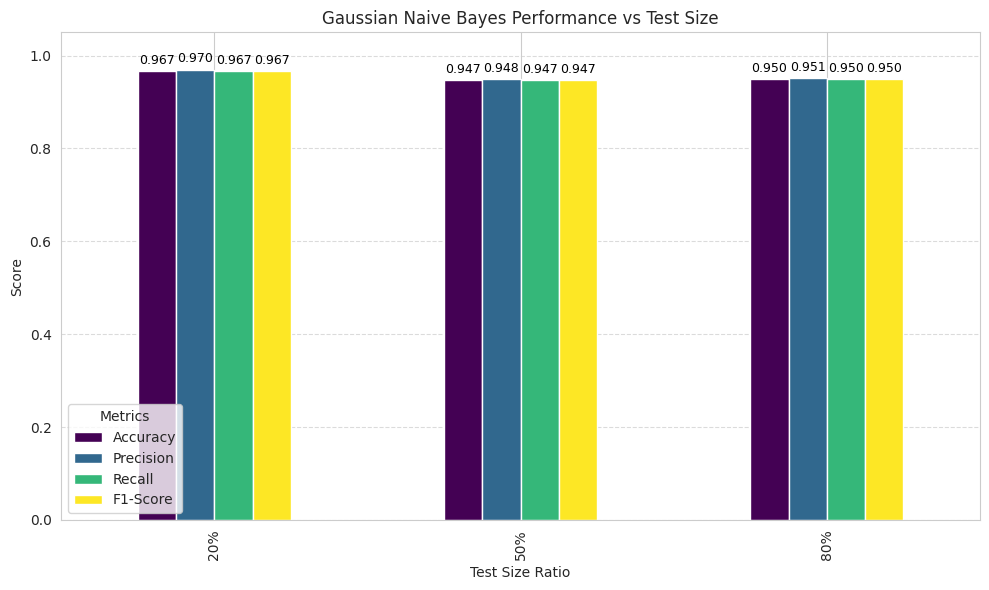

In [46]:
split_ratios = [0.2, 0.5, 0.8]
metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

for test_size in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)

    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred, average="weighted"))
    metrics["Recall"].append(recall_score(y_test, y_pred, average="weighted"))
    metrics["F1-Score"].append(f1_score(y_test, y_pred, average="weighted"))

split_labels = [f"{int(r * 100)}%" for r in split_ratios]
metrics_df = pd.DataFrame(metrics, index=split_labels)

print("\nMetrics Comparison Table:\n")
print(metrics_df)

plt.figure(figsize=(10, 6))
ax = metrics_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color="black", xytext=(0, 3),
                textcoords='offset points')

plt.title("Gaussian Naive Bayes Performance vs Test Size")
plt.xlabel("Test Size Ratio")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()




--- Multinomial Naive Bayes Results ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



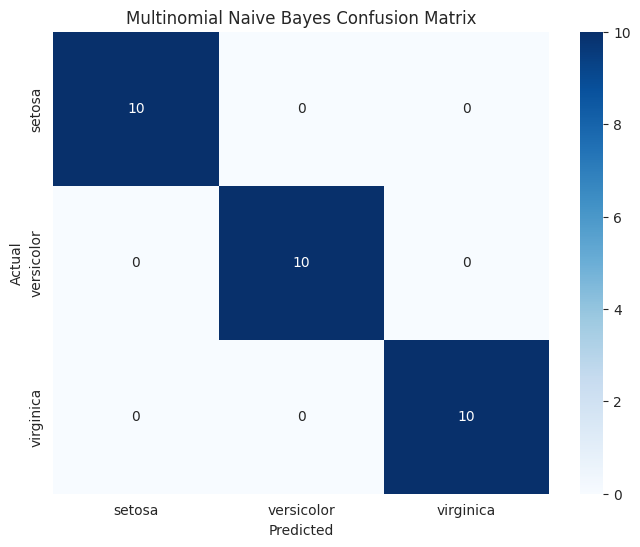

In [10]:
# --- Multinomial Naive Bayes ---
print("\n--- Multinomial Naive Bayes Results ---")
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_mnb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mnb, target_names=target_names))

cm_mnb = confusion_matrix(y_test, y_pred_mnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



MultinomialNB Metrics Comparison Table:

     Accuracy  Precision    Recall  F1-Score
20%  1.000000   1.000000  1.000000  1.000000
50%  0.986667   0.987179  0.986667  0.986661
80%  0.958333   0.958516  0.958333  0.958327


<Figure size 1000x600 with 0 Axes>

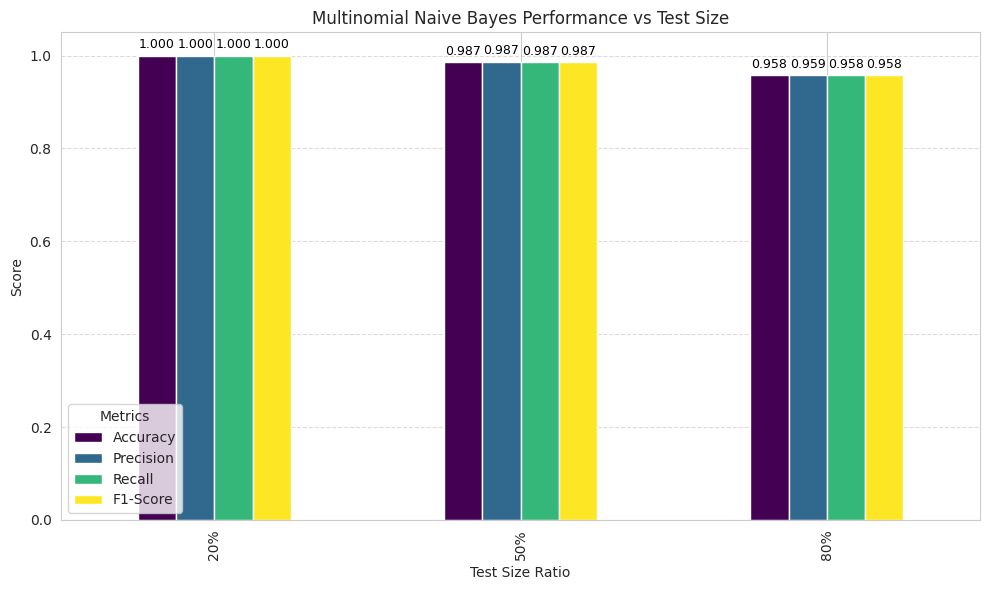

In [47]:

split_ratios = [0.2, 0.5, 0.8]
metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

for test_size in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    y_pred = mnb.predict(X_test)

    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred, average="weighted"))
    metrics["Recall"].append(recall_score(y_test, y_pred, average="weighted"))
    metrics["F1-Score"].append(f1_score(y_test, y_pred, average="weighted"))

split_labels = [f"{int(r * 100)}%" for r in split_ratios]
metrics_df = pd.DataFrame(metrics, index=split_labels)

print("\nMultinomialNB Metrics Comparison Table:\n")
print(metrics_df)

plt.figure(figsize=(10, 6))
ax = metrics_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color="black", xytext=(0, 3),
                textcoords='offset points')

plt.title("Multinomial Naive Bayes Performance vs Test Size")
plt.xlabel("Test Size Ratio")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



--- Bernoulli Naive Bayes Results ---
Accuracy: 0.9667

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



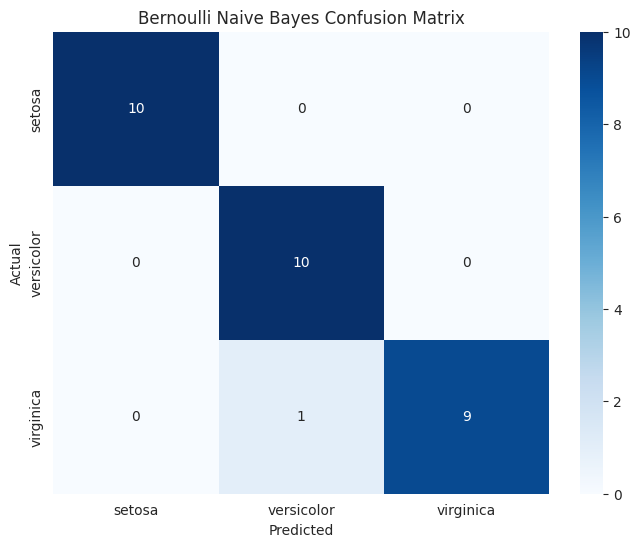

In [19]:

# --- Bernoulli Naive Bayes ---
print("\n--- Bernoulli Naive Bayes Results ---")
bnb = BernoulliNB(binarize=1.75)
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_bnb):.4f}")
print("\nClassification Report:")

print(classification_report(y_test, y_pred_bnb, target_names=target_names, zero_division=0))
cm_bnb = confusion_matrix(y_test, y_pred_bnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Bernoulli Naive Bayes Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



BernoulliNB Metrics Comparison Table:

     Accuracy  Precision    Recall  F1-Score
20%  0.966667   0.969697  0.966667  0.966583
50%  0.946667   0.954023  0.946667  0.947229
80%  0.941667   0.946547  0.941667  0.942357


<Figure size 1000x600 with 0 Axes>

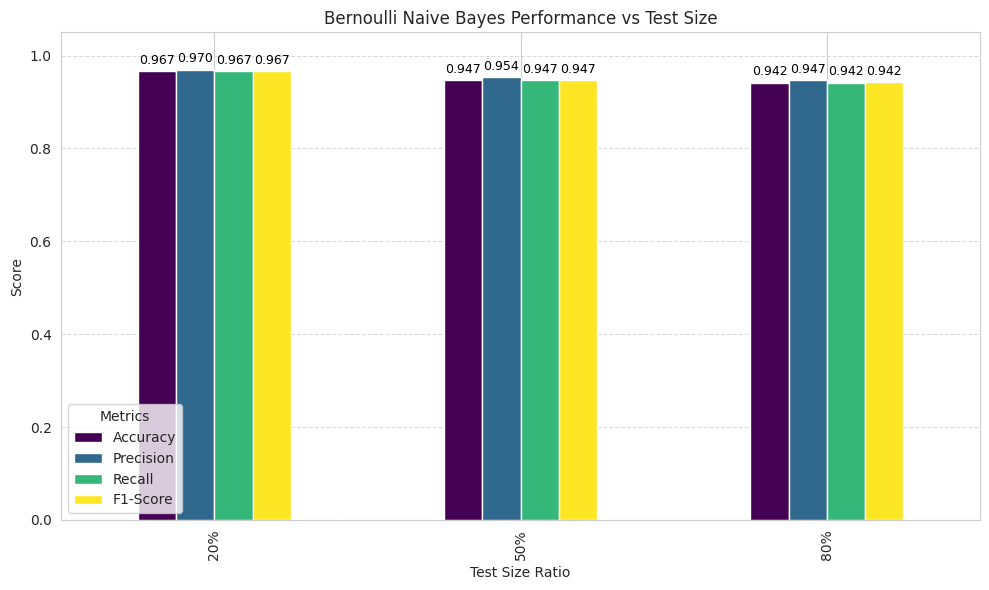

In [48]:

split_ratios = [0.2, 0.5, 0.8]
metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

for test_size in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )
    bnb = BernoulliNB(binarize=1.75)
    bnb.fit(X_train, y_train)
    y_pred_bnb = bnb.predict(X_test)

    metrics["Accuracy"].append(accuracy_score(y_test, y_pred_bnb))
    metrics["Precision"].append(precision_score(y_test, y_pred_bnb, average="weighted"))
    metrics["Recall"].append(recall_score(y_test, y_pred_bnb, average="weighted"))
    metrics["F1-Score"].append(f1_score(y_test, y_pred_bnb, average="weighted"))

split_labels = [f"{int(r * 100)}%" for r in split_ratios]
metrics_df = pd.DataFrame(metrics, index=split_labels)

print("\nBernoulliNB Metrics Comparison Table:\n")
print(metrics_df)

plt.figure(figsize=(10, 6))
ax = metrics_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color="black", xytext=(0, 3),
                textcoords='offset points')

plt.title("Bernoulli Naive Bayes Performance vs Test Size")
plt.xlabel("Test Size Ratio")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



--- Decision Tree (Gini) Results ---
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



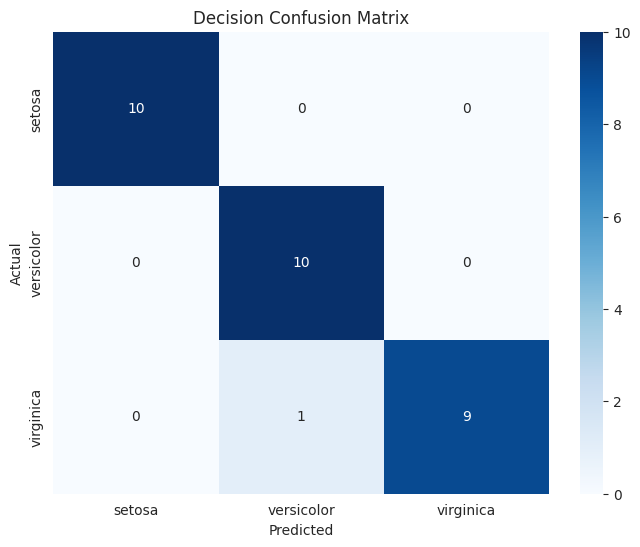

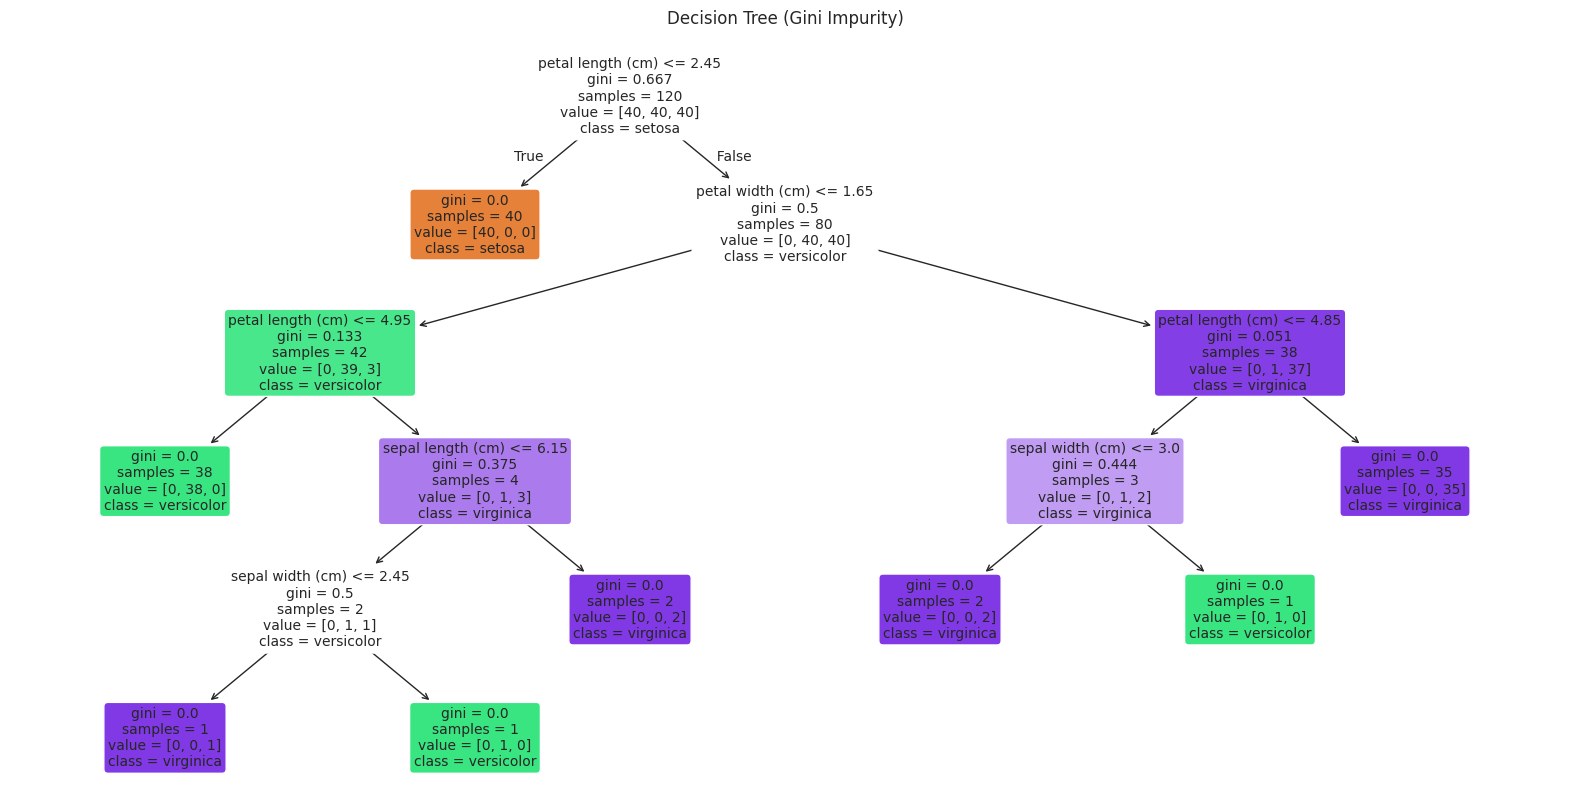

In [20]:
print("\n--- Decision Tree (Gini) Results ---")

dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42,max_depth=10)
dt_gini.fit(X_train, y_train)

y_pred_dt_gini = dt_gini.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_gini):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_gini, target_names=target_names))


#Confusion
print(classification_report(y_test, y_pred_dt_gini, target_names=target_names, zero_division=0))
cm_dtgini = confusion_matrix(y_test, y_pred_bnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtgini, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Decision Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 3. Visualize the  Tree
plt.figure(figsize=(20,10))
plot_tree(dt_gini, filled=True, feature_names=feature_names, class_names=target_names, rounded=True, fontsize=10)
plt.title("Decision Tree (Gini Impurity)")
plt.show()



Decision Tree (Gini) Metrics Comparison Table:

     Accuracy  Precision    Recall  F1-Score
20%  0.933333   0.933333  0.933333  0.933333
50%  0.880000   0.898148  0.880000  0.877601
80%  0.916667   0.927083  0.916667  0.915825


<Figure size 1000x600 with 0 Axes>

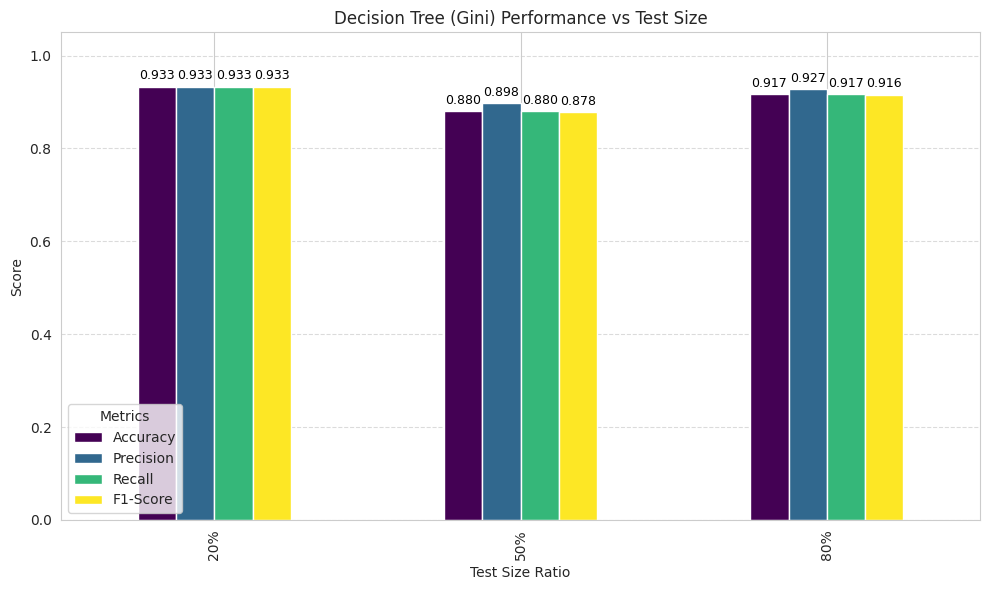

In [49]:
split_ratios = [0.2, 0.5, 0.8]
metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

for test_size in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )
    dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=10)
    dt_gini.fit(X_train, y_train)

    y_pred_dt_gini = dt_gini.predict(X_test)

    metrics["Accuracy"].append(accuracy_score(y_test, y_pred_dt_gini))
    metrics["Precision"].append(precision_score(y_test, y_pred_dt_gini, average="weighted"))
    metrics["Recall"].append(recall_score(y_test, y_pred_dt_gini, average="weighted"))
    metrics["F1-Score"].append(f1_score(y_test, y_pred_dt_gini, average="weighted"))

split_labels = [f"{int(r * 100)}%" for r in split_ratios]
metrics_df = pd.DataFrame(metrics, index=split_labels)

print("\nDecision Tree (Gini) Metrics Comparison Table:\n")
print(metrics_df)

plt.figure(figsize=(10, 6))
ax = metrics_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color="black", xytext=(0, 3),
                textcoords='offset points')

plt.title("Decision Tree (Gini) Performance vs Test Size")
plt.xlabel("Test Size Ratio")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


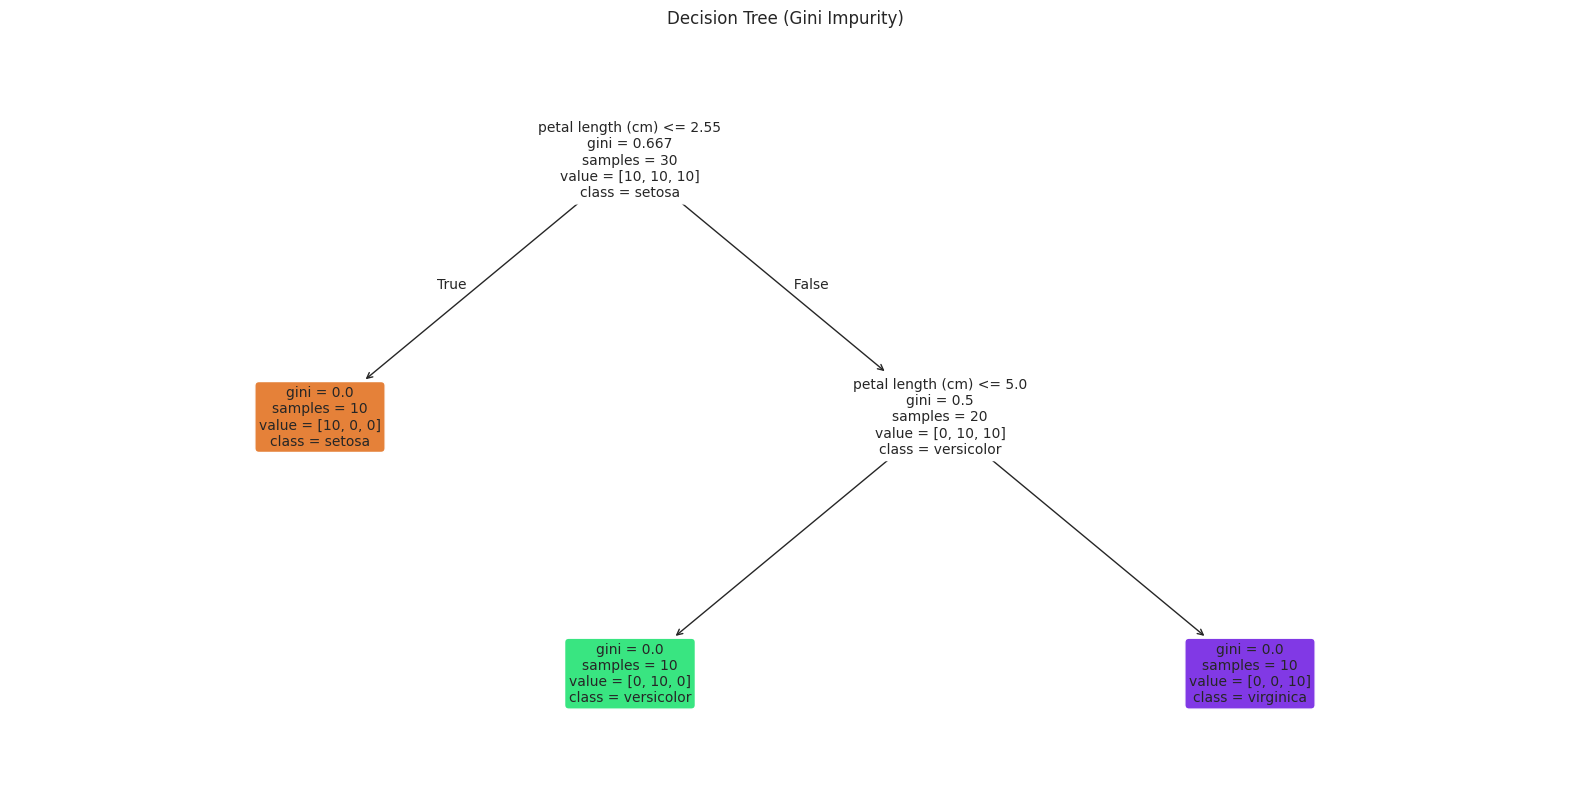

In [22]:
# 3. Visualize the  Tree
plt.figure(figsize=(20,10))
plot_tree(dt_gini, filled=True, feature_names=feature_names, class_names=target_names, rounded=True, fontsize=10)
plt.title("Decision Tree (Gini Impurity)")
plt.show()


--- Decision Tree (Entropy) Results ---
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



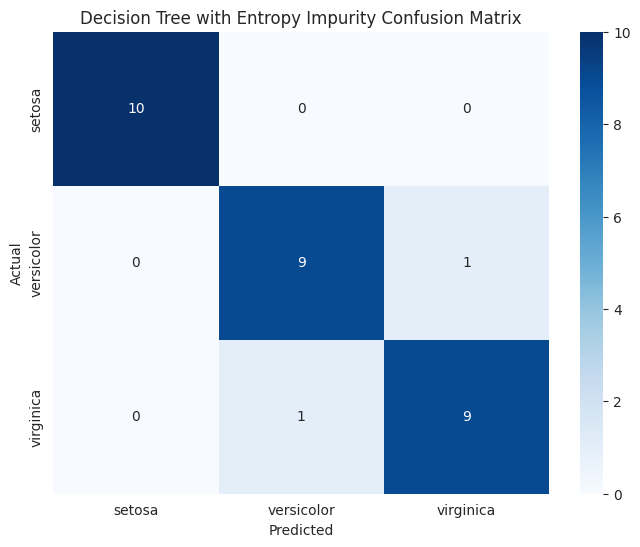

In [27]:

# --- Decision Tree with Entropy ---
print("\n--- Decision Tree (Entropy) Results ---")

dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)


y_pred_dt_entropy = dt_entropy.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt_entropy):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_entropy, target_names=target_names))

#confusion

cm_dtentropy = confusion_matrix(y_test, y_pred_dt_entropy)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtentropy, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Decision Tree with Entropy Impurity Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()




Decision Tree (Entropy) Metrics Comparison Table:

     Accuracy  Precision    Recall  F1-Score
20%  0.933333   0.933333  0.933333  0.933333
50%  0.880000   0.898148  0.880000  0.877601
80%  0.916667   0.927083  0.916667  0.915825


<Figure size 1000x600 with 0 Axes>

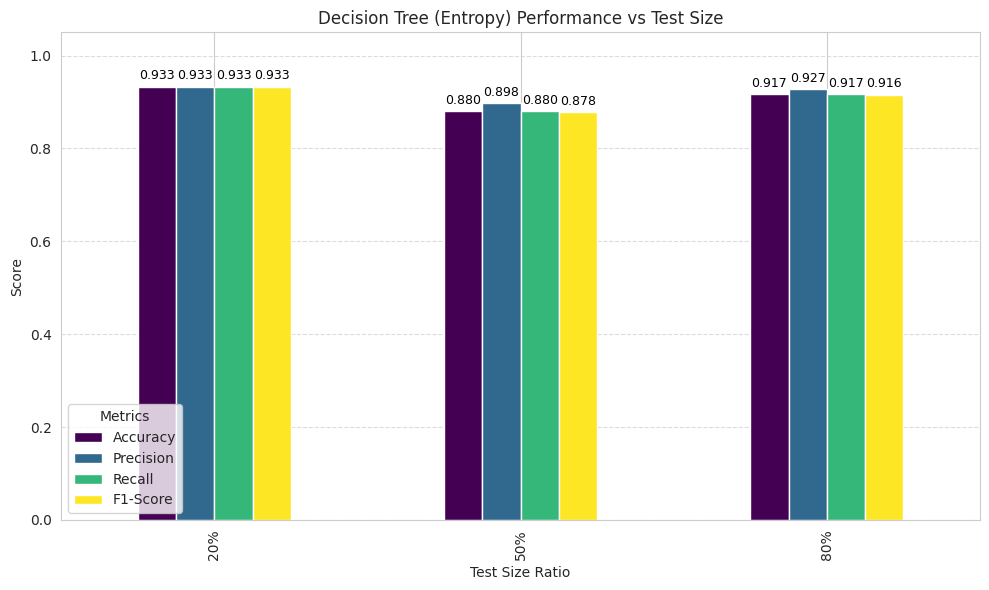

In [50]:
split_ratios = [0.2, 0.5, 0.8]
metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

for test_size in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )
    dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dt_entropy.fit(X_train, y_train)

    y_pred_dt_entropy = dt_entropy.predict(X_test)

    metrics["Accuracy"].append(accuracy_score(y_test, y_pred_dt_entropy))
    metrics["Precision"].append(precision_score(y_test, y_pred_dt_entropy, average="weighted"))
    metrics["Recall"].append(recall_score(y_test, y_pred_dt_entropy, average="weighted"))
    metrics["F1-Score"].append(f1_score(y_test, y_pred_dt_entropy, average="weighted"))

split_labels = [f"{int(r * 100)}%" for r in split_ratios]
metrics_df = pd.DataFrame(metrics, index=split_labels)

print("\nDecision Tree (Entropy) Metrics Comparison Table:\n")
print(metrics_df)

plt.figure(figsize=(10, 6))
ax = metrics_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color="black", xytext=(0, 3),
                textcoords='offset points')

plt.title("Decision Tree (Entropy) Performance vs Test Size")
plt.xlabel("Test Size Ratio")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



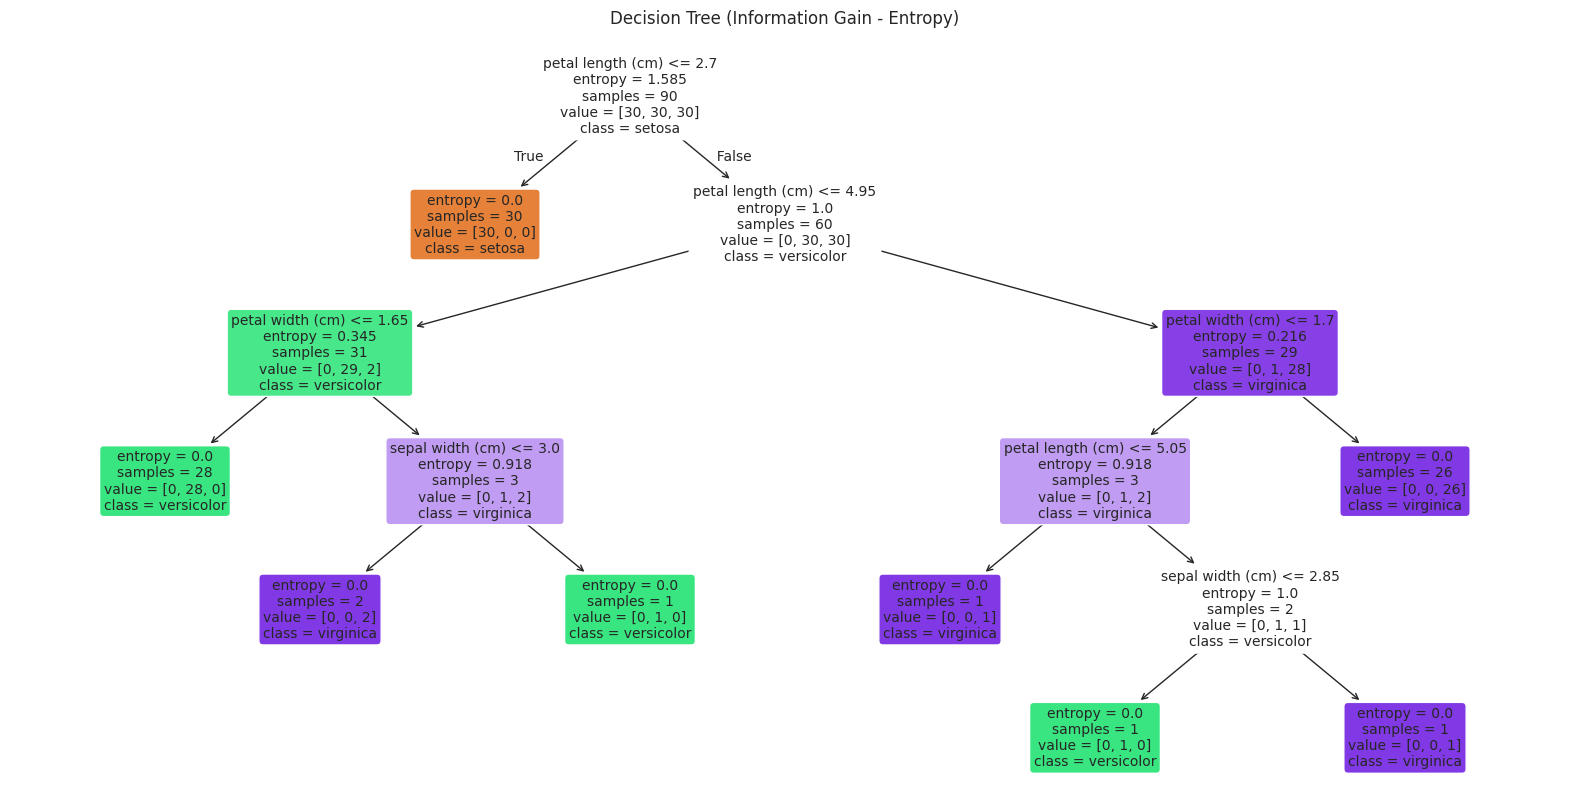

In [ ]:

plt.figure(figsize=(20,10))
plot_tree(dt_entropy, filled=True, feature_names=feature_names, class_names=target_names, rounded=True, fontsize=10)
plt.title("Decision Tree (Information Gain - Entropy)")
plt.show()


--- Tuning the Decision Tree ---
Depth: 1, Accuracy: 0.6667
Depth: 2, Accuracy: 0.9167
Depth: 3, Accuracy: 0.9833
Depth: 4, Accuracy: 0.9500
Depth: 5, Accuracy: 0.9500
Depth: 6, Accuracy: 0.9500
Depth: 7, Accuracy: 0.9500
Depth: 8, Accuracy: 0.9500
Depth: 9, Accuracy: 0.9500
Depth: 10, Accuracy: 0.9500

Best performance achieved with max_depth = 3
Highest accuracy on test set: 0.9833

--- Final Tuned Decision Tree Results ---
Accuracy: 0.9833

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       1.00      0.95      0.97        20
   virginica       0.95      1.00      0.98        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



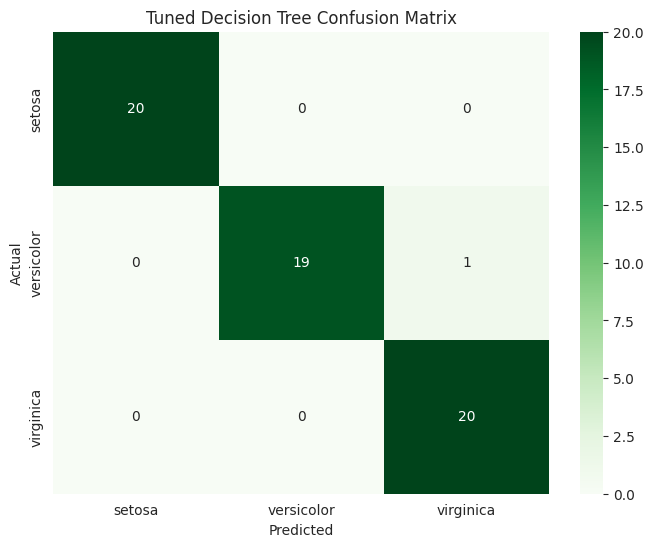

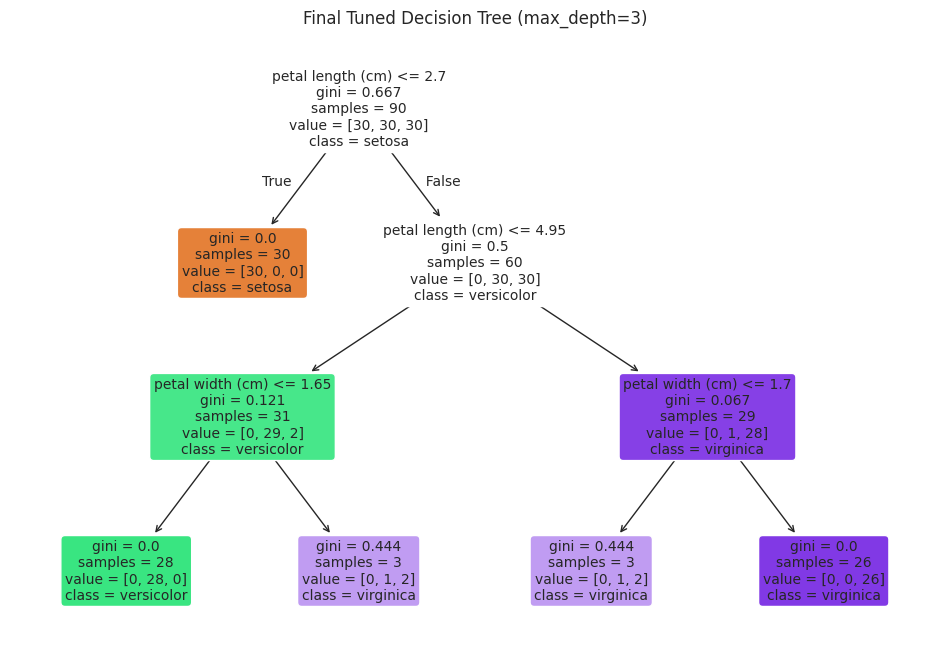

In [ ]:

print("\n--- Tuning the Decision Tree ---")


best_accuracy = 0
best_depth = 0

for depth in range(1, 11):

    dt_tuned = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    dt_tuned.fit(X_train, y_train)


    accuracy = dt_tuned.score(X_test, y_test)

    print(f"Depth: {depth}, Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"\nBest performance achieved with max_depth = {best_depth}")
print(f"Highest accuracy on test set: {best_accuracy:.4f}")


print("\n--- Final Tuned Decision Tree Results ---")
final_dt = DecisionTreeClassifier(criterion='gini', max_depth=best_depth, random_state=42)
final_dt.fit(X_train, y_train)
y_pred_final_dt = final_dt.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_final_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final_dt, target_names=target_names))


cm_final_dt = confusion_matrix(y_test, y_pred_final_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final_dt, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.title('Tuned Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

plt.figure(figsize=(12,8))
plot_tree(final_dt, filled=True, feature_names=feature_names, class_names=target_names, rounded=True, fontsize=10)
plt.title(f"Final Tuned Decision Tree (max_depth={best_depth})")
plt.show()



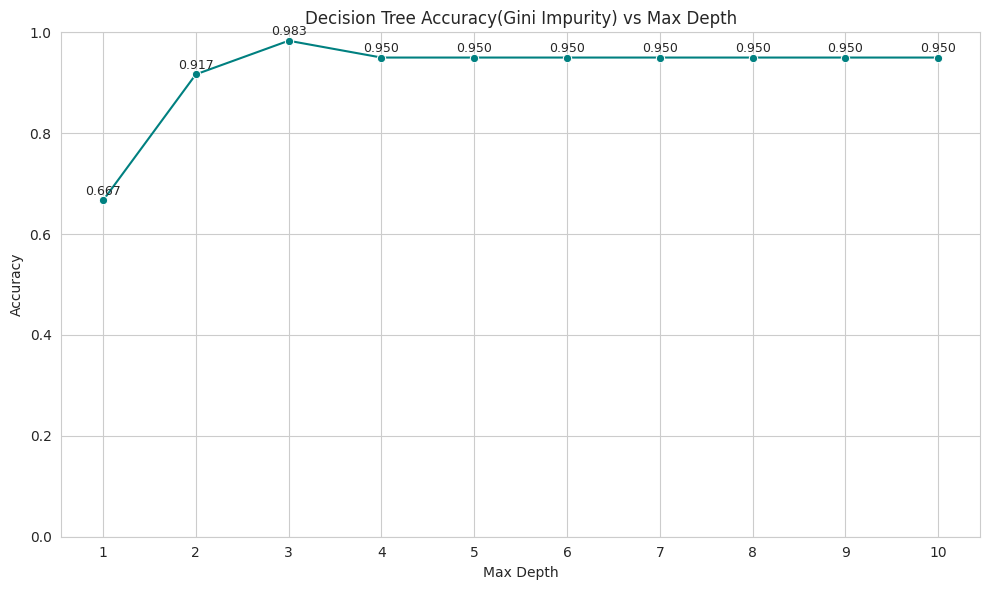

In [ ]:

depths = list(range(1, 11))
accuracies = []

for depth in depths:
    dt = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    acc = dt.score(X_test, y_test)
    accuracies.append(acc)


plt.figure(figsize=(10, 6))
sns.lineplot(x=depths, y=accuracies, marker='o', color='teal')


for i, acc in enumerate(accuracies):
    plt.text(depths[i], acc + 0.005, f"{acc:.3f}", ha='center', va='bottom', fontsize=9)

plt.title('Decision Tree Accuracy(Gini Impurity) vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.xticks(depths)
plt.grid(True)
plt.tight_layout()


--- Tuning the Decision Tree ---
Depth: 1, Accuracy: 0.6667
Depth: 2, Accuracy: 0.9167
Depth: 3, Accuracy: 0.9833
Depth: 4, Accuracy: 0.9500
Depth: 5, Accuracy: 0.9500
Depth: 6, Accuracy: 0.9500
Depth: 7, Accuracy: 0.9500
Depth: 8, Accuracy: 0.9500
Depth: 9, Accuracy: 0.9500
Depth: 10, Accuracy: 0.9500

Best performance achieved with max_depth = 3
Highest accuracy on test set: 0.9833

--- Final Tuned Decision Tree Results ---
Accuracy: 0.9833

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       1.00      0.95      0.97        20
   virginica       0.95      1.00      0.98        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



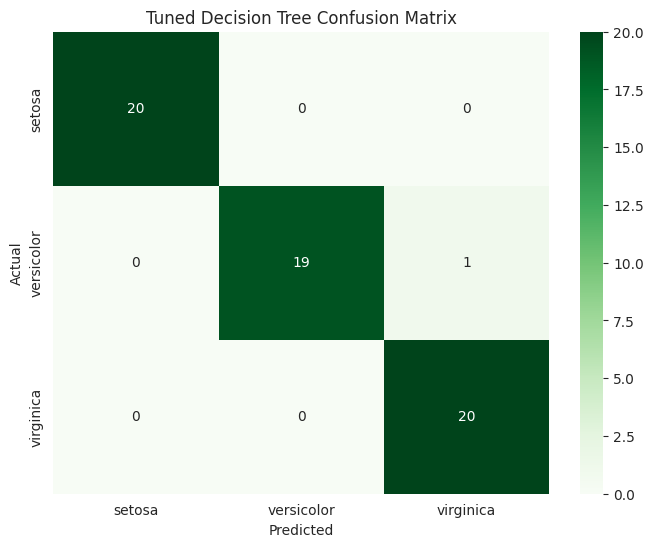

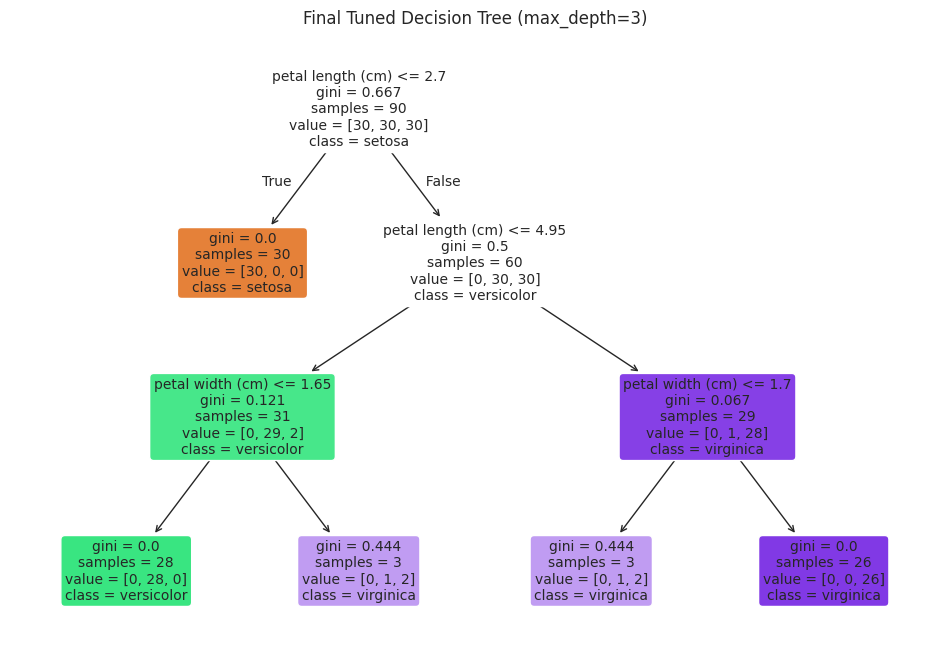

In [ ]:

print("\n--- Tuning the Decision Tree ---")


best_accuracy = 0
best_depth = 0

for depth in range(1, 11):

    dt_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    dt_tuned.fit(X_train, y_train)


    accuracy = dt_tuned.score(X_test, y_test)

    print(f"Depth: {depth}, Accuracy: {accuracy:.4f}")


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"\nBest performance achieved with max_depth = {best_depth}")
print(f"Highest accuracy on test set: {best_accuracy:.4f}")


print("\n--- Final Tuned Decision Tree Results ---")
final_dt = DecisionTreeClassifier(criterion='gini', max_depth=best_depth, random_state=42)
final_dt.fit(X_train, y_train)
y_pred_final_dt = final_dt.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_final_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final_dt, target_names=target_names))


cm_final_dt = confusion_matrix(y_test, y_pred_final_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final_dt, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.title('Tuned Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

plt.figure(figsize=(12,8))
plot_tree(final_dt, filled=True, feature_names=feature_names, class_names=target_names, rounded=True, fontsize=10)
plt.title(f"Final Tuned Decision Tree (max_depth={best_depth})")
plt.show()


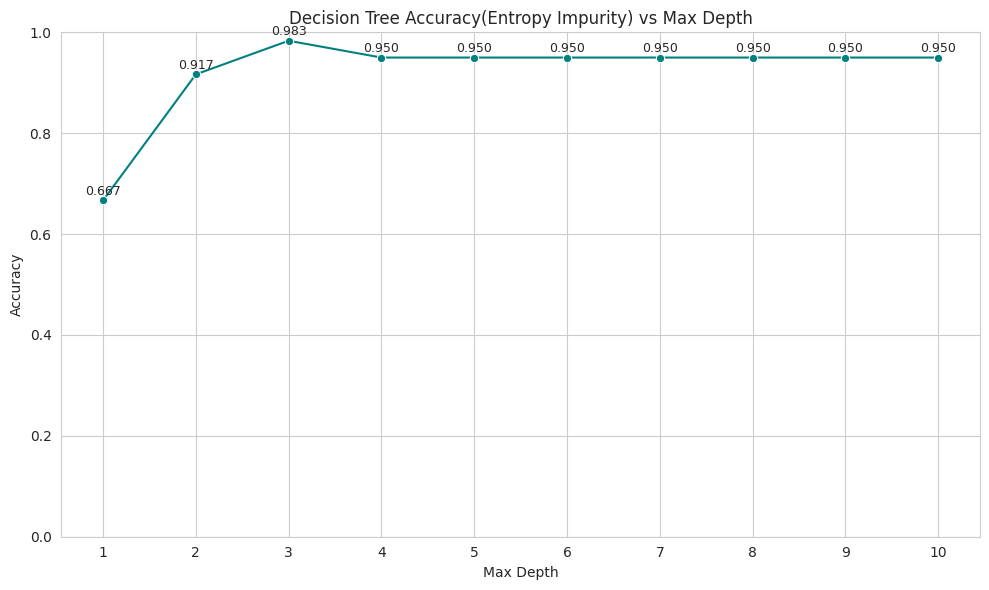

In [ ]:
# Store accuracies for each depth
depths = list(range(1, 11))
accuracies = []

for depth in depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    acc = dt.score(X_test, y_test)
    accuracies.append(acc)


plt.figure(figsize=(10, 6))
sns.lineplot(x=depths, y=accuracies, marker='o', color='teal')


for i, acc in enumerate(accuracies):
    plt.text(depths[i], acc + 0.005, f"{acc:.3f}", ha='center', va='bottom', fontsize=9)

plt.title('Decision Tree Accuracy(Entropy Impurity) vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.ylim(0, 1.0)
plt.xticks(depths)
plt.grid(True)
plt.tight_layout()

<h1> BREAST CANCER DATASET </h1>


In [39]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target
feature_names_cancer = cancer.feature_names
target_names_cancer = cancer.target_names

print("Dataset Shape:", X_cancer.shape)
print("Target Names:", target_names_cancer) # 'malignant', 'benign'


df_cancer = pd.DataFrame(X_cancer, columns=feature_names_cancer)

print("First 5 rows of the dataset:")
print(df_cancer.head())
print("\nDataset Information:")
df_cancer.info()



Dataset Shape: (569, 30)
Target Names: ['malignant' 'benign']
First 5 rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

 

In [40]:

# Split the data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)
print(f"Training set size: {X_train_c.shape[0]} samples")
print(f"Test set size: {X_test_c.shape[0]} samples")


Training set size: 455 samples
Test set size: 114 samples


--- Gaussian Naive Bayes Results ---
Accuracy: 0.9386

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        42
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



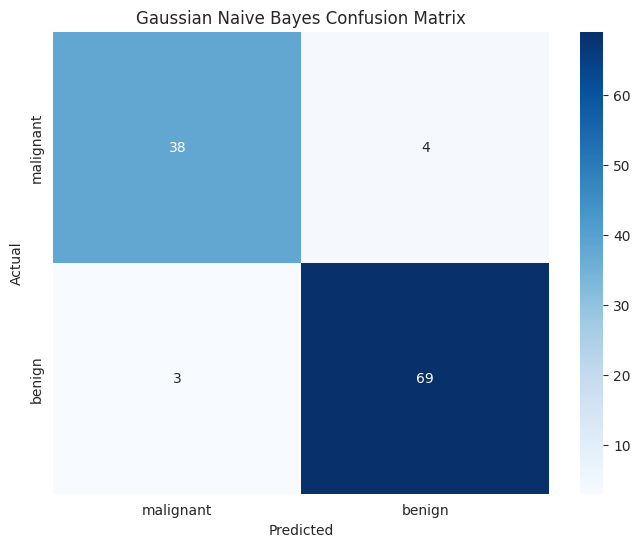

In [41]:
print("--- Gaussian Naive Bayes Results ---")

gnb = GaussianNB()

gnb.fit(X_train_c, y_train_c)

y_pred_gnb = gnb.predict(X_test_c)

print(f"Accuracy: {accuracy_score(y_test_c, y_pred_gnb):.4f}")
print("\nClassification Report:")

print(classification_report(y_test_c, y_pred_gnb, target_names=target_names_cancer))

cm_gnb = confusion_matrix(y_test_c, y_pred_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=target_names_cancer, yticklabels=target_names_cancer)
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Gaussian Naive Bayes Metrics Comparison Table (Breast Cancer Dataset):

     Accuracy  Precision    Recall  F1-Score
20%  0.938596   0.938435  0.938596  0.938438
50%  0.943860   0.945177  0.943860  0.943233
80%  0.940789   0.943462  0.940789  0.939889


<Figure size 1000x600 with 0 Axes>

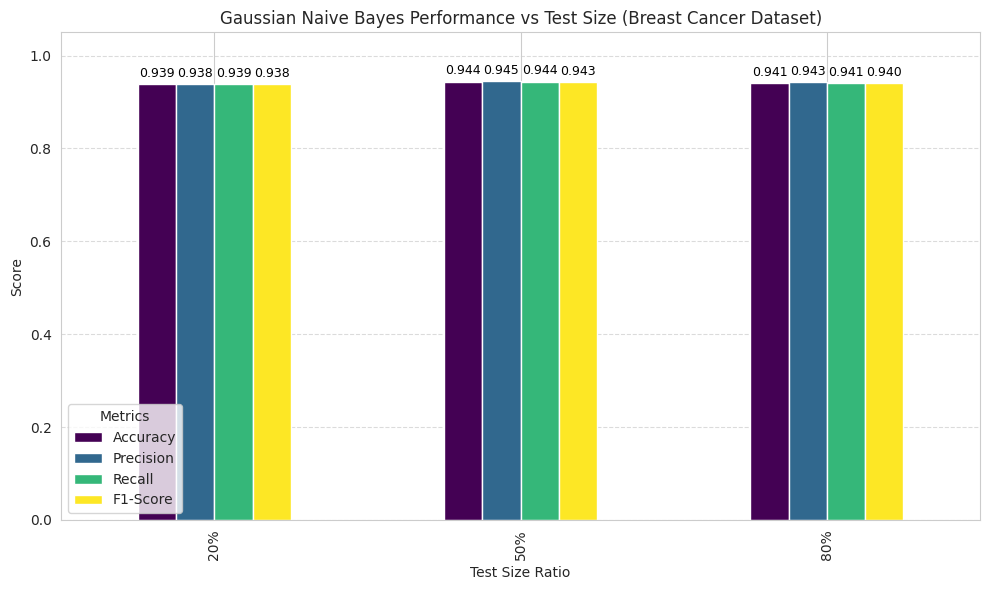

In [51]:
split_ratios = [0.2, 0.5, 0.8]
metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

for test_size in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X_cancer, y_cancer, test_size=test_size, random_state=42, stratify=y_cancer
    )
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)

    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred, average="weighted"))
    metrics["Recall"].append(recall_score(y_test, y_pred, average="weighted"))
    metrics["F1-Score"].append(f1_score(y_test, y_pred, average="weighted"))

split_labels = [f"{int(r * 100)}%" for r in split_ratios]
metrics_df = pd.DataFrame(metrics, index=split_labels)

print("\nGaussian Naive Bayes Metrics Comparison Table (Breast Cancer Dataset):\n")
print(metrics_df)

plt.figure(figsize=(10, 6))
ax = metrics_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color="black", xytext=(0, 3),
                textcoords='offset points')

plt.title("Gaussian Naive Bayes Performance vs Test Size (Breast Cancer Dataset)")
plt.xlabel("Test Size Ratio")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



--- Multinomial Naive Bayes Results ---
Accuracy: 0.9298

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.86      0.90        42
      benign       0.92      0.97      0.95        72

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



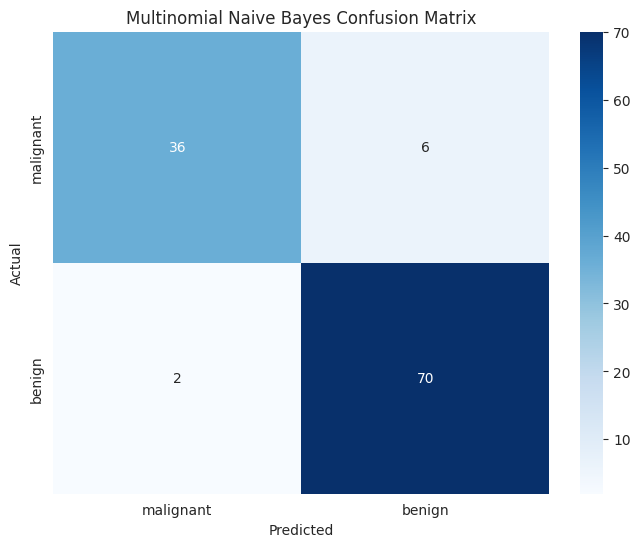

In [ ]:
print("--- Multinomial Naive Bayes Results ---")

mnb = MultinomialNB()

mnb.fit(X_train_c, y_train_c)

y_pred_mnb = mnb.predict(X_test_c)

print(f"Accuracy: {accuracy_score(y_test_c, y_pred_mnb):.4f}")
print("\nClassification Report:")

print(classification_report(y_test_c, y_pred_mnb, target_names=target_names_cancer))

cm_mnb = confusion_matrix(y_test_c, y_pred_mnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues', xticklabels=target_names_cancer, yticklabels=target_names_cancer)
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



Multinomial Naive Bayes Metrics Comparison Table (Breast Cancer Dataset):

     Accuracy  Precision    Recall  F1-Score
20%  0.929825   0.930748  0.929825  0.929018
50%  0.908772   0.911699  0.908772  0.907000
80%  0.894737   0.903877  0.894737  0.891159


<Figure size 1000x600 with 0 Axes>

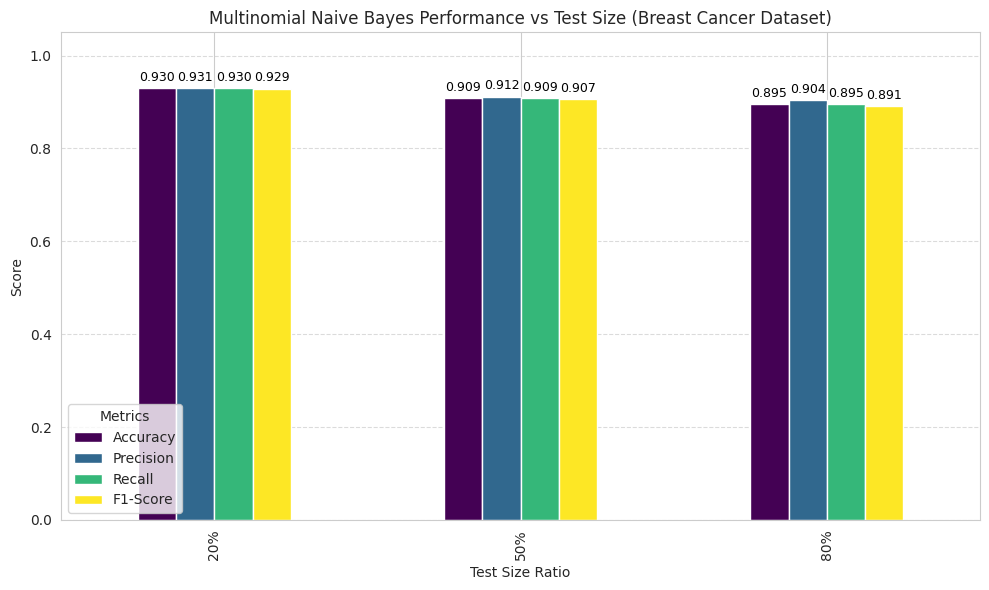

In [52]:
split_ratios = [0.2, 0.5, 0.8]
metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

for test_size in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X_cancer, y_cancer, test_size=test_size, random_state=42, stratify=y_cancer
    )
    mnb = MultinomialNB()
    mnb.fit(X_train, y_train)
    y_pred = mnb.predict(X_test)

    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred, average="weighted"))
    metrics["Recall"].append(recall_score(y_test, y_pred, average="weighted"))
    metrics["F1-Score"].append(f1_score(y_test, y_pred, average="weighted"))

split_labels = [f"{int(r * 100)}%" for r in split_ratios]
metrics_df = pd.DataFrame(metrics, index=split_labels)

print("\nMultinomial Naive Bayes Metrics Comparison Table (Breast Cancer Dataset):\n")
print(metrics_df)

plt.figure(figsize=(10, 6))
ax = metrics_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color="black", xytext=(0, 3),
                textcoords='offset points')

plt.title("Multinomial Naive Bayes Performance vs Test Size (Breast Cancer Dataset)")
plt.xlabel("Test Size Ratio")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



--- Bernoulli Naive Bayes Results ---
Accuracy: 0.8509

Classification Report:
              precision    recall  f1-score   support

   malignant       0.88      0.69      0.77        42
      benign       0.84      0.94      0.89        72

    accuracy                           0.85       114
   macro avg       0.86      0.82      0.83       114
weighted avg       0.85      0.85      0.85       114



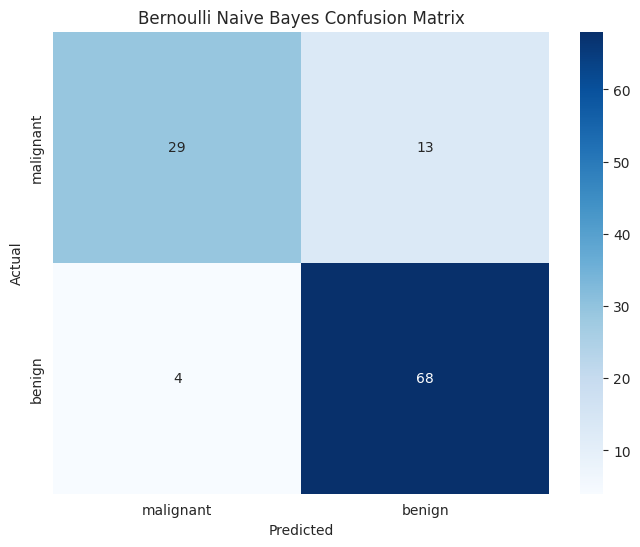

In [32]:

# --- Bernoulli Naive Bayes ---
print("\n--- Bernoulli Naive Bayes Results ---")
bnb = BernoulliNB(binarize=0.54)
bnb.fit(X_train_c, y_train_c)
y_pred_bnb = bnb.predict(X_test_c)
print(f"Accuracy: {accuracy_score(y_test_c, y_pred_bnb):.4f}")
print("\nClassification Report:")

print(classification_report(y_test_c, y_pred_bnb, target_names=target_names_cancer, zero_division=0))
cm_bnb = confusion_matrix(y_test_c, y_pred_bnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues', xticklabels=target_names_cancer, yticklabels=target_names_cancer)
plt.title('Bernoulli Naive Bayes Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Bernoulli Naive Bayes Metrics Comparison Table (Breast Cancer Dataset):

     Accuracy  Precision    Recall  F1-Score
20%  0.850877   0.853978  0.850877  0.846316
50%  0.863158   0.873183  0.863158  0.857442
80%  0.844298   0.853775  0.844298  0.837332


<Figure size 1000x600 with 0 Axes>

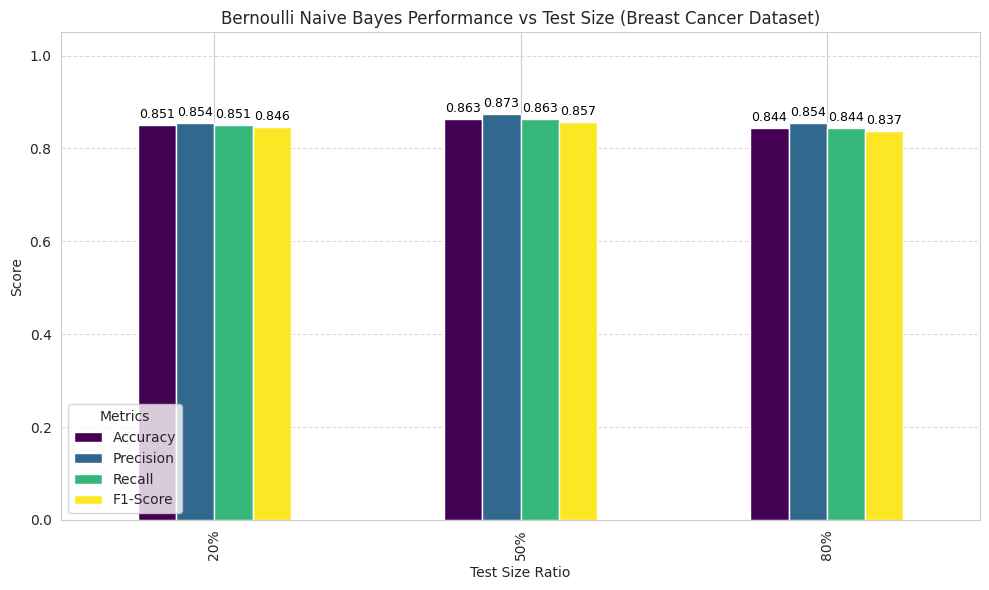

In [53]:
# --- Bernoulli Naive Bayes Comparison across Test Sizes ---
split_ratios = [0.2, 0.5, 0.8]
metrics = {"Accuracy": [], "Precision": [], "Recall": [], "F1-Score": []}

for test_size in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X_cancer, y_cancer, test_size=test_size, random_state=42, stratify=y_cancer
    )
    bnb = BernoulliNB(binarize=0.54)
    bnb.fit(X_train, y_train)
    y_pred = bnb.predict(X_test)

    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred, average="weighted", zero_division=0))
    metrics["Recall"].append(recall_score(y_test, y_pred, average="weighted", zero_division=0))
    metrics["F1-Score"].append(f1_score(y_test, y_pred, average="weighted", zero_division=0))

split_labels = [f"{int(r * 100)}%" for r in split_ratios]
metrics_df = pd.DataFrame(metrics, index=split_labels)

print("\nBernoulli Naive Bayes Metrics Comparison Table (Breast Cancer Dataset):\n")
print(metrics_df)

plt.figure(figsize=(10, 6))
ax = metrics_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color="black", xytext=(0, 3),
                textcoords='offset points')

plt.title("Bernoulli Naive Bayes Performance vs Test Size (Breast Cancer Dataset)")
plt.xlabel("Test Size Ratio")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend(title="Metrics")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()




--- Decision Tree (Gini) Results ---
Accuracy: 0.9123

Classification Report:
              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



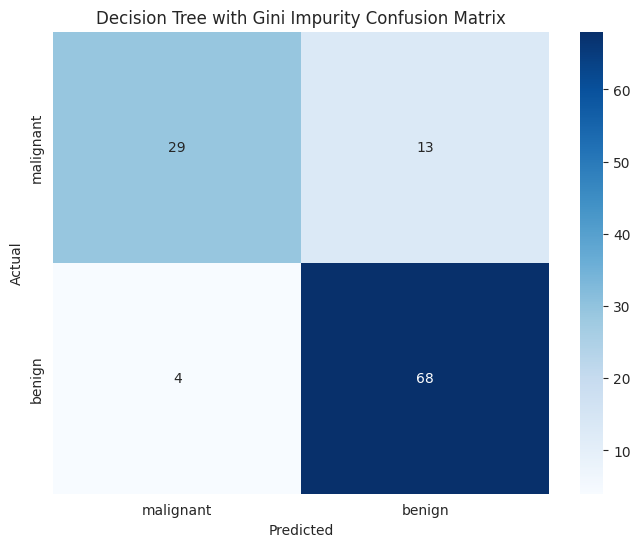

In [34]:
print("\n--- Decision Tree (Gini) Results ---")

dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train_c, y_train_c)

y_pred_dt_gini = dt_gini.predict(X_test_c)
print(f"Accuracy: {accuracy_score(y_test_c, y_pred_dt_gini):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_dt_gini, target_names=target_names_cancer))


#Confusion
print(classification_report(y_test_c, y_pred_dt_gini, target_names=target_names_cancer, zero_division=0))
cm_dtgini = confusion_matrix(y_test_c, y_pred_bnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtgini, annot=True, fmt='d', cmap='Blues', xticklabels=target_names_cancer, yticklabels=target_names_cancer)
plt.title('Decision Tree with Gini Impurity Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()




--- Decision Tree (Gini) Results with Multiple Metrics ---

Test Size = 0.2
Accuracy: 0.9123
Precision (weighted): 0.9161
Recall (weighted): 0.9123
F1-Score (weighted): 0.9130

Classification Report:
              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



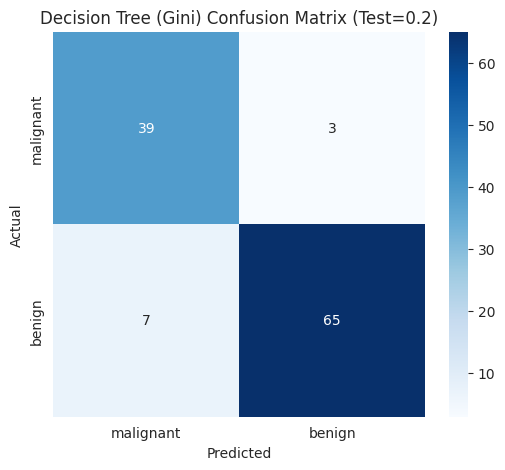


Test Size = 0.5
Accuracy: 0.9123
Precision (weighted): 0.9130
Recall (weighted): 0.9123
F1-Score (weighted): 0.9125

Classification Report:
              precision    recall  f1-score   support

   malignant       0.87      0.90      0.88       106
      benign       0.94      0.92      0.93       179

    accuracy                           0.91       285
   macro avg       0.90      0.91      0.91       285
weighted avg       0.91      0.91      0.91       285



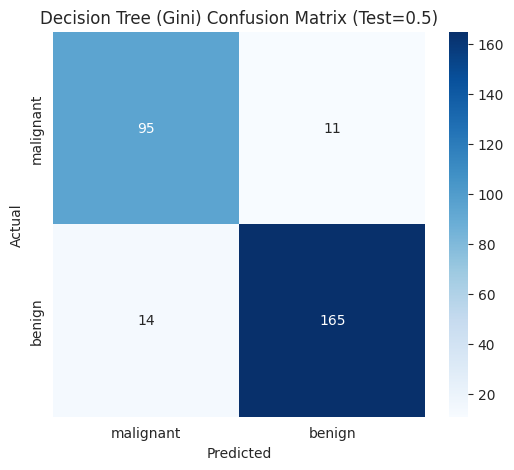


Test Size = 0.8
Accuracy: 0.8750
Precision (weighted): 0.8762
Recall (weighted): 0.8750
F1-Score (weighted): 0.8727

Classification Report:
              precision    recall  f1-score   support

   malignant       0.89      0.76      0.82       170
      benign       0.87      0.94      0.90       286

    accuracy                           0.88       456
   macro avg       0.88      0.85      0.86       456
weighted avg       0.88      0.88      0.87       456



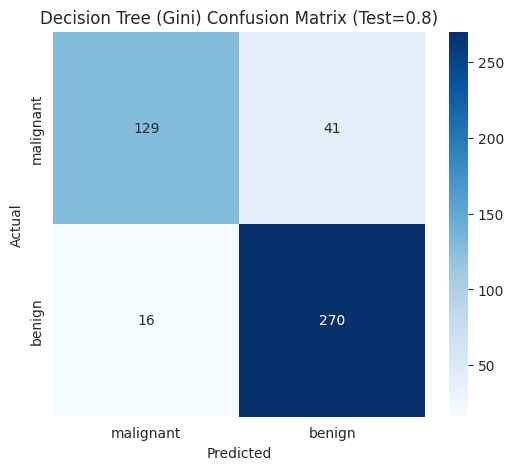

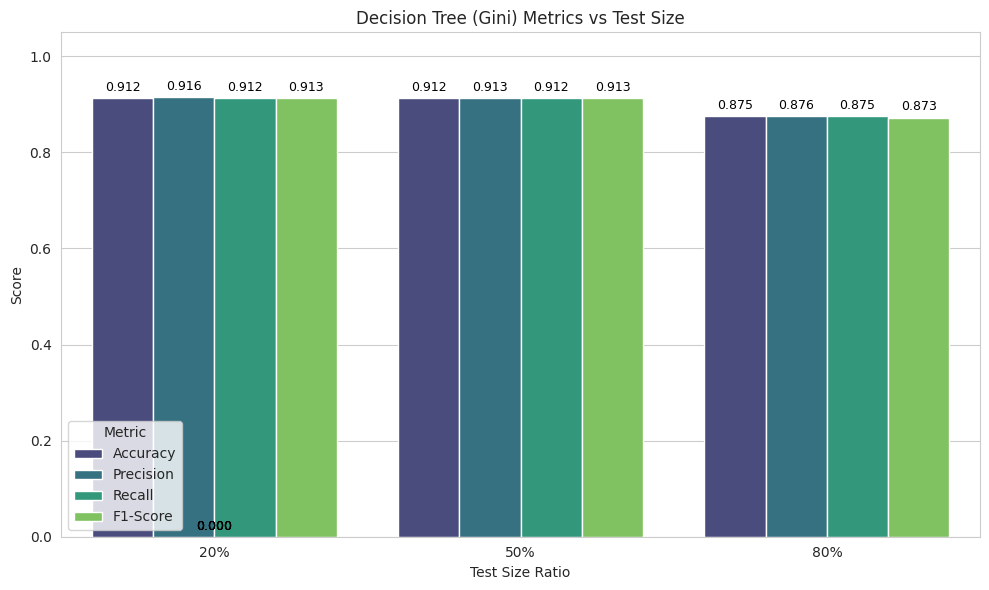

In [44]:
print("\n--- Decision Tree (Gini) Results with Multiple Metrics ---")

# Different test split ratios
split_ratios = [0.2, 0.5, 0.8]

# Store metrics for comparison
results = {
    "Split": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

for test_size in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X_cancer, y_cancer, test_size=test_size, random_state=42, stratify=y_cancer
    )

    dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
    dt_gini.fit(X_train, y_train)
    y_pred_dt_gini = dt_gini.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred_dt_gini)
    precision = precision_score(y_test, y_pred_dt_gini, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred_dt_gini, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred_dt_gini, average='weighted', zero_division=0)

    # Save results
    results["Split"].append(f"{int(test_size * 100)}%")
    results["Accuracy"].append(acc)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)

    print(f"\nTest Size = {test_size:.1f}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (weighted): {precision:.4f}")
    print(f"Recall (weighted): {recall:.4f}")
    print(f"F1-Score (weighted): {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_dt_gini, target_names=target_names_cancer, zero_division=0))

    # Confusion Matrix
    cm_dtgini = confusion_matrix(y_test, y_pred_dt_gini)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_dtgini, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names_cancer, yticklabels=target_names_cancer)
    plt.title(f'Decision Tree (Gini) Confusion Matrix (Test={test_size:.1f})')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


# --- Comparison Plot for All Metrics ---
df_results = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melt, x="Split", y="Score", hue="Metric", palette="viridis")

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color="black", xytext=(0, 3),
                textcoords='offset points')

plt.title("Decision Tree (Gini) Metrics vs Test Size")
plt.ylabel("Score")
plt.xlabel("Test Size Ratio")
plt.ylim(0, 1.05)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()




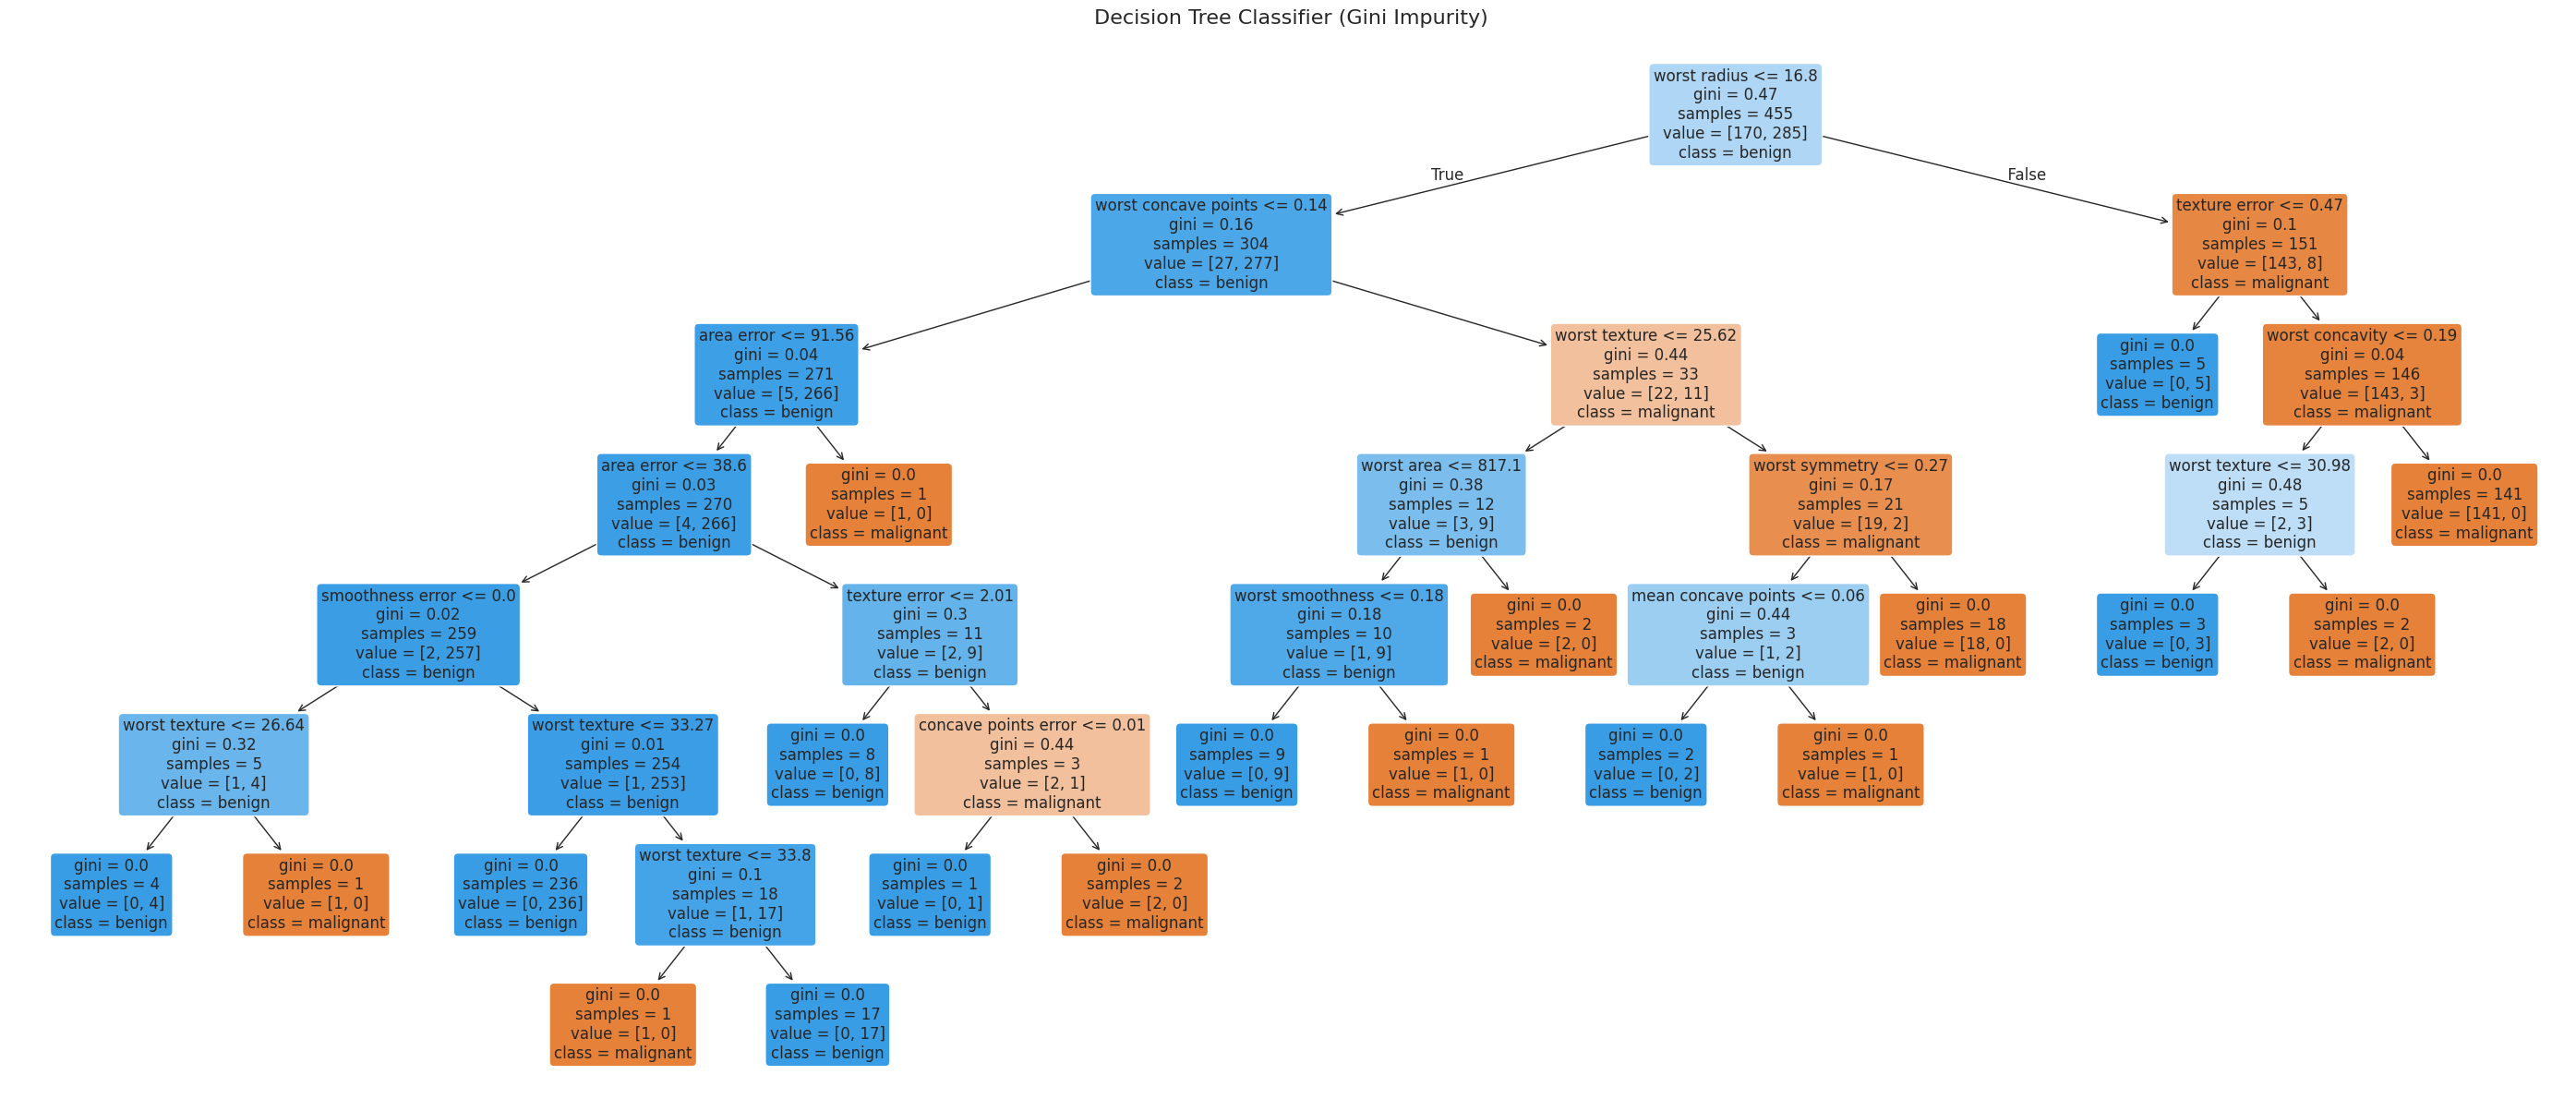

In [ ]:

plt.figure(figsize=(28,12))

plot_tree(
    dt_gini,
    feature_names=feature_names_cancer,
    class_names=target_names_cancer,
    filled=True,
    rounded=True,
    fontsize=12,
    impurity=True,
    precision=2
)

plt.title(" Decision Tree Classifier (Gini Impurity)", fontsize=16, pad=20)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Tree Depth", fontsize=14)
plt.tight_layout()
plt.show()



--- Decision Tree (Entropy) Results ---
Accuracy: 0.9123

Classification Report:
              precision    recall  f1-score   support

   malignant       0.83      0.95      0.89        42
      benign       0.97      0.89      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



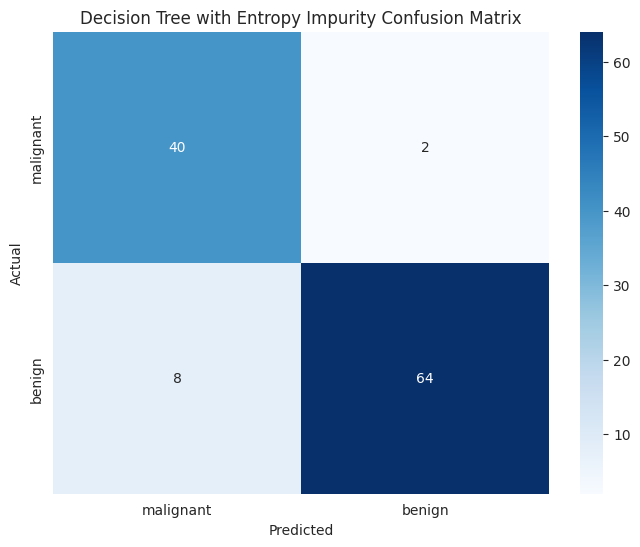

In [ ]:

# --- Decision Tree with Entropy ---
print("\n--- Decision Tree (Entropy) Results ---")

dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train_c, y_train_c)


y_pred_dt_entropy = dt_entropy.predict(X_test_c)
print(f"Accuracy: {accuracy_score(y_test_c, y_pred_dt_entropy):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_dt_entropy, target_names=target_names_cancer))

#confusion

cm_dtentropy = confusion_matrix(y_test_c, y_pred_dt_entropy)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtentropy, annot=True, fmt='d', cmap='Blues', xticklabels=target_names_cancer, yticklabels=target_names_cancer)
plt.title('Decision Tree with Entropy Impurity Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



--- Decision Tree (Entropy) Split Comparison ---
  Test Size  Accuracy  Precision    Recall  F1-score
0       20%  0.912281   0.919458  0.912281  0.913298
1       50%  0.947368   0.947290  0.947368  0.947317
2       80%  0.875000   0.876178  0.875000  0.872657


<Figure size 1000x600 with 0 Axes>

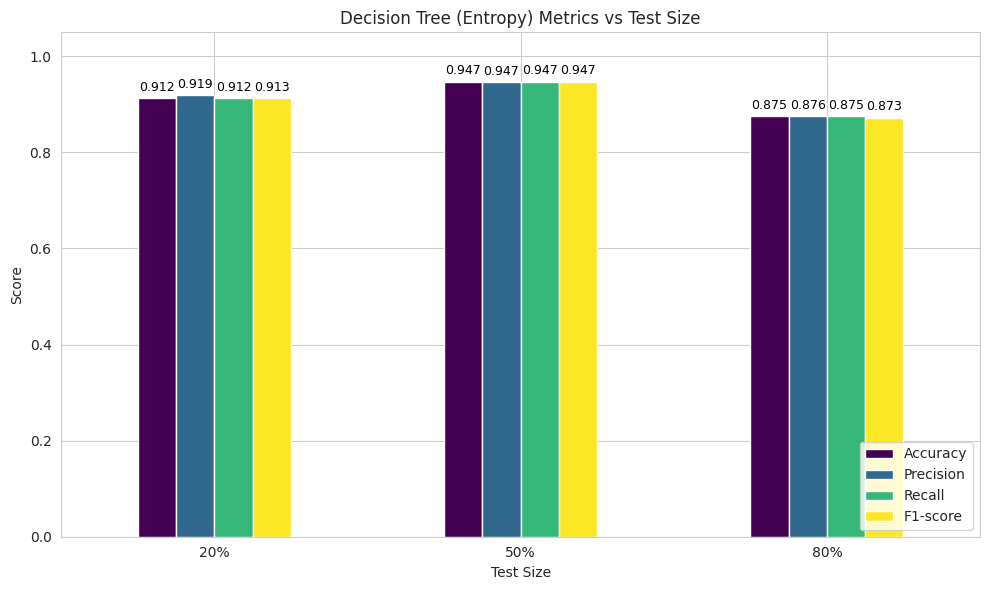

In [45]:

print("\n--- Decision Tree (Entropy) Split Comparison ---")

split_ratios = [0.2, 0.5, 0.8]

results_entropy = {
    "Test Size": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": []
}

for test_size in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X_cancer, y_cancer,
        test_size=test_size,
        random_state=42,
        stratify=y_cancer
    )

    # Train Decision Tree with Entropy
    dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dt_entropy.fit(X_train, y_train)
    y_pred = dt_entropy.predict(X_test)

    # Collect metrics
    results_entropy["Test Size"].append(f"{int(test_size*100)}%")
    results_entropy["Accuracy"].append(accuracy_score(y_test, y_pred))
    results_entropy["Precision"].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    results_entropy["Recall"].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    results_entropy["F1-score"].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Convert to DataFrame
df_entropy = pd.DataFrame(results_entropy)
print(df_entropy)

# --- Plot Metrics ---
plt.figure(figsize=(10, 6))
ax = df_entropy.set_index("Test Size").plot(kind='bar', figsize=(10, 6), cmap="viridis")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color="black", xytext=(0, 3),
                textcoords='offset points')

plt.title("Decision Tree (Entropy) Metrics vs Test Size")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()




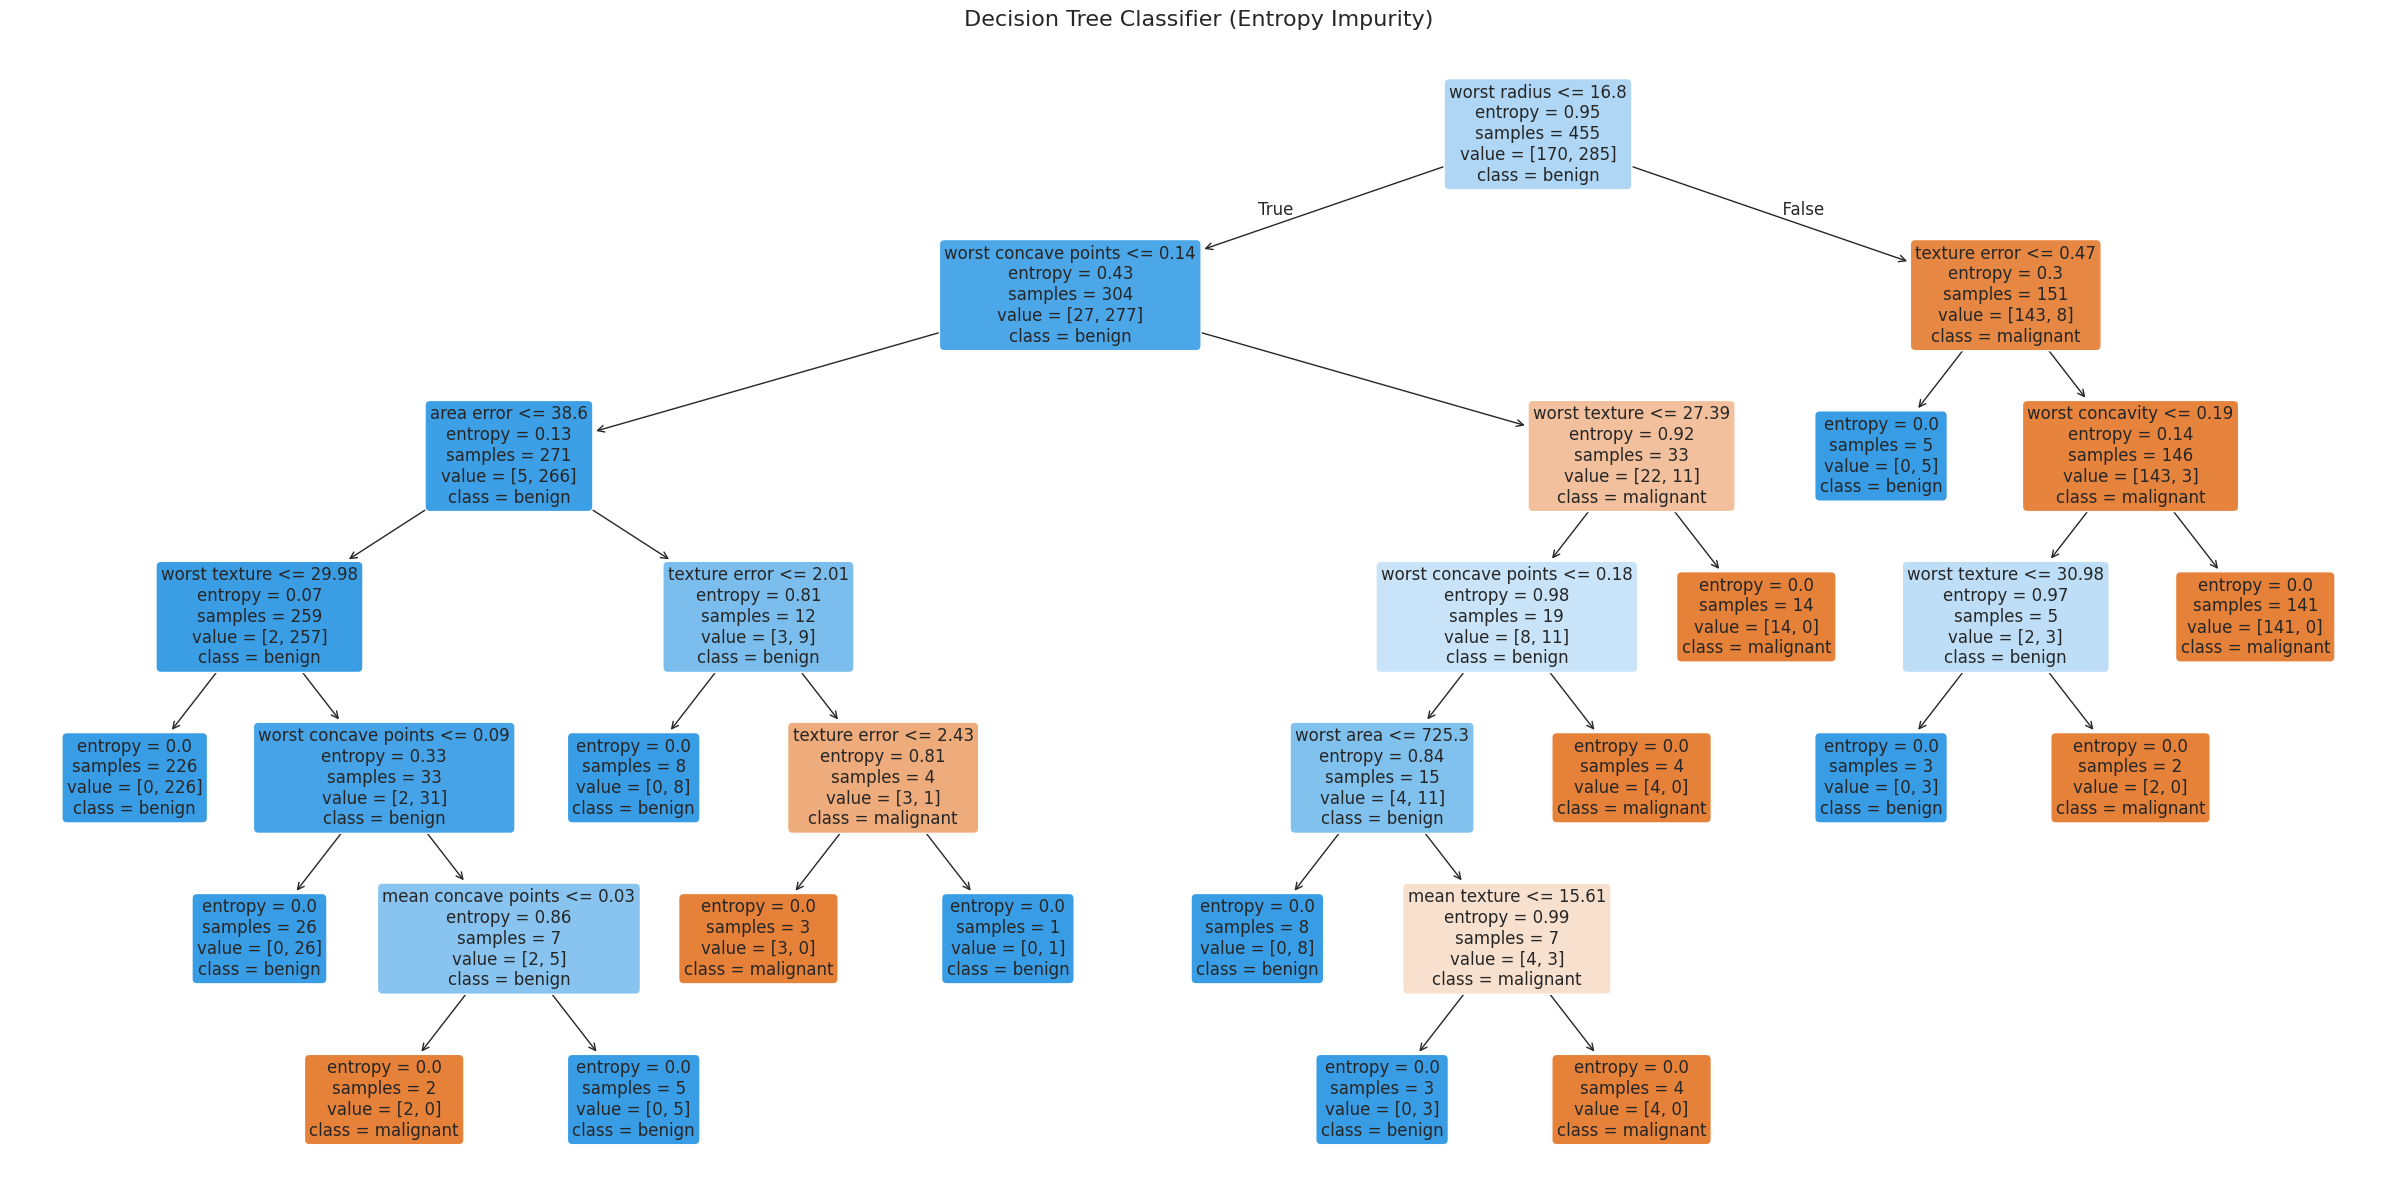

In [ ]:
plt.figure(figsize=(24,12))

plot_tree(
    dt_entropy,
    feature_names=feature_names_cancer,
    class_names=target_names_cancer,
    filled=True,
    rounded=True,
    fontsize=12,
    impurity=True,
    precision=2
)

plt.title(" Decision Tree Classifier (Entropy Impurity)", fontsize=16, pad=20)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Tree Depth", fontsize=14)
plt.tight_layout()
plt.show()


--- Tuning the Decision Tree ---
Depth: 1, Accuracy: 0.9211
Depth: 2, Accuracy: 0.8947
Depth: 3, Accuracy: 0.9386
Depth: 4, Accuracy: 0.9386
Depth: 5, Accuracy: 0.9211
Depth: 6, Accuracy: 0.9123
Depth: 7, Accuracy: 0.9123
Depth: 8, Accuracy: 0.9123
Depth: 9, Accuracy: 0.9123
Depth: 10, Accuracy: 0.9123

Best performance achieved with max_depth = 3
Highest accuracy on test set: 0.9386

--- Final Tuned Decision Tree Results ---
Accuracy: 0.9386

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        42
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



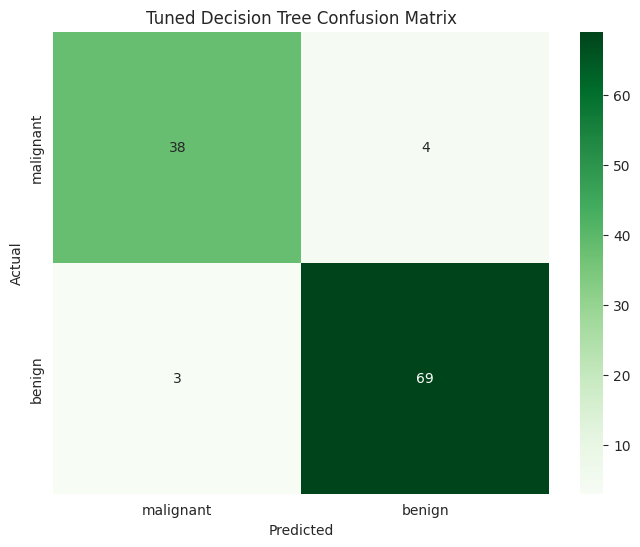

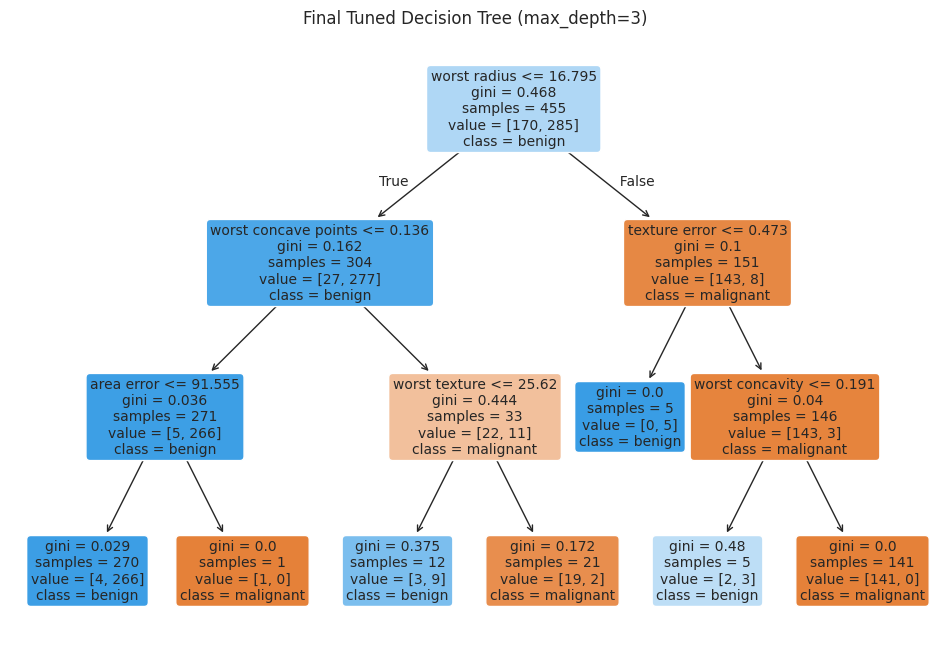

In [ ]:
# --- Tuning the Decision Tree ---
print("\n--- Tuning the Decision Tree ---")


best_accuracy = 0
best_depth = 0

for depth in range(1, 11):

    dt_tuned = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    dt_tuned.fit(X_train_c, y_train_c)


    accuracy = dt_tuned.score(X_test_c, y_test_c)

    print(f"Depth: {depth}, Accuracy: {accuracy:.4f}")


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"\nBest performance achieved with max_depth = {best_depth}")
print(f"Highest accuracy on test set: {best_accuracy:.4f}")


print("\n--- Final Tuned Decision Tree Results ---")
final_dt = DecisionTreeClassifier(criterion='gini', max_depth=best_depth, random_state=42)
final_dt.fit(X_train_c, y_train_c)
y_pred_final_dt = final_dt.predict(X_test_c)

print(f"Accuracy: {accuracy_score(y_test_c, y_pred_final_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_final_dt, target_names=target_names_cancer))


cm_final_dt = confusion_matrix(y_test_c, y_pred_final_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final_dt, annot=True, fmt='d', cmap='Greens', xticklabels=target_names_cancer, yticklabels=target_names_cancer)
plt.title('Tuned Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

plt.figure(figsize=(12,8))
plot_tree(final_dt, filled=True, feature_names=feature_names_cancer, class_names=target_names_cancer, rounded=True, fontsize=10)
plt.title(f"Final Tuned Decision Tree (max_depth={best_depth})")
plt.show()


--- Tuning the Decision Tree ---
Depth: 1, Accuracy: 0.9211
Depth: 2, Accuracy: 0.8947
Depth: 3, Accuracy: 0.9474
Depth: 4, Accuracy: 0.9386
Depth: 5, Accuracy: 0.9298
Depth: 6, Accuracy: 0.9123
Depth: 7, Accuracy: 0.9123
Depth: 8, Accuracy: 0.9123
Depth: 9, Accuracy: 0.9123
Depth: 10, Accuracy: 0.9123

Best performance achieved with max_depth = 3
Highest accuracy on test set: 0.9474

--- Final Tuned Decision Tree Results ---
Accuracy: 0.9474

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.90      0.93        42
      benign       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



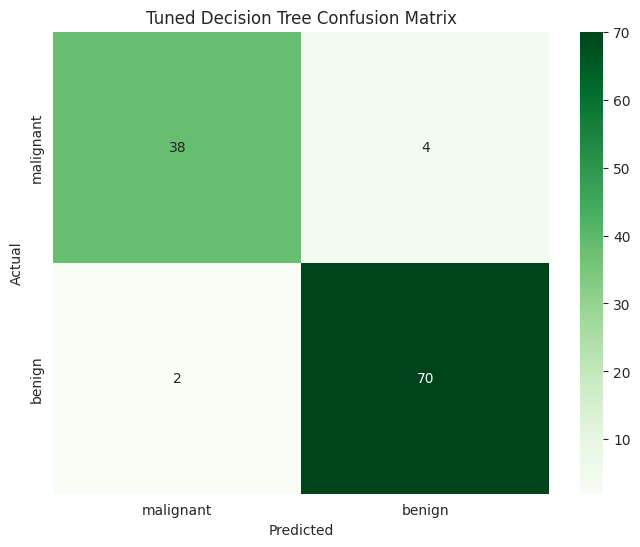

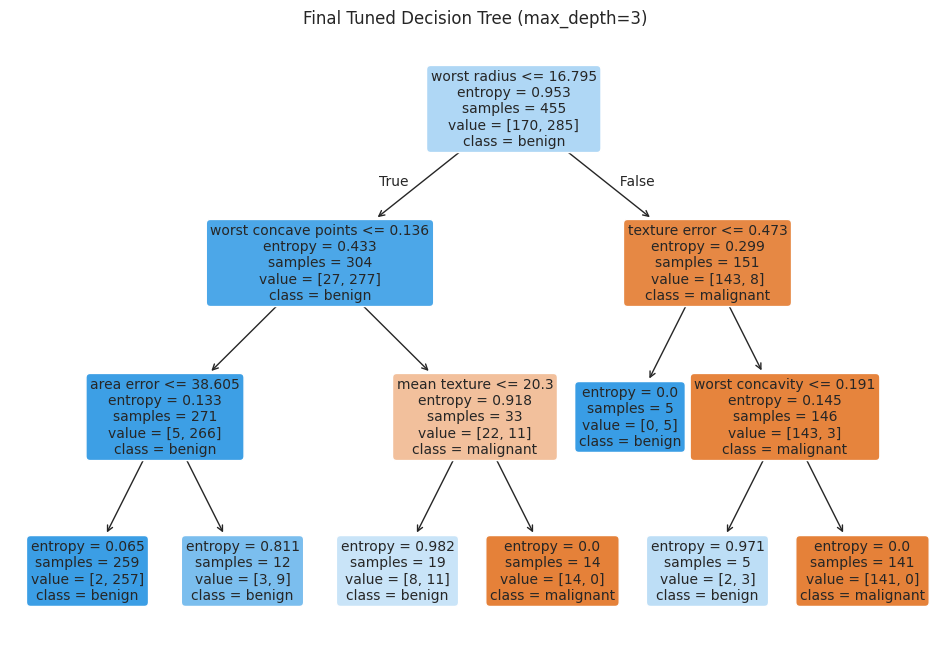

In [ ]:
# --- Tuning the Decision Tree ---
print("\n--- Tuning the Decision Tree ---")


best_accuracy = 0
best_depth = 0

for depth in range(1, 11):

    dt_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    dt_tuned.fit(X_train_c, y_train_c)


    accuracy = dt_tuned.score(X_test_c, y_test_c)

    print(f"Depth: {depth}, Accuracy: {accuracy:.4f}")


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"\nBest performance achieved with max_depth = {best_depth}")
print(f"Highest accuracy on test set: {best_accuracy:.4f}")


print("\n--- Final Tuned Decision Tree Results ---")
final_dt = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=42)
final_dt.fit(X_train_c, y_train_c)
y_pred_final_dt = final_dt.predict(X_test_c)

print(f"Accuracy: {accuracy_score(y_test_c, y_pred_final_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_c, y_pred_final_dt, target_names=target_names_cancer))


cm_final_dt = confusion_matrix(y_test_c, y_pred_final_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final_dt, annot=True, fmt='d', cmap='Greens', xticklabels=target_names_cancer, yticklabels=target_names_cancer)
plt.title('Tuned Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

plt.figure(figsize=(12,8))
plot_tree(final_dt, filled=True, feature_names=feature_names_cancer, class_names=target_names_cancer, rounded=True, fontsize=10)
plt.title(f"Final Tuned Decision Tree (max_depth={best_depth})")
plt.show()